In [1]:
# @title Import Libraries & download file
!pip install kagglehub
import kagglehub
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Download latest version
path = kagglehub.dataset_download("juhibhojani/house-price")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/house-price


In [2]:
# @title Read File
df1 = pd.read_csv(f'{path}/house_prices.csv')
df1.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


# Preprocessing Scaling

In [3]:
# @title Fix Amount(in rupees) (scaling) τις μοναδες μετρησεις
# Συνάρτηση για να μετατρέψουμε τις τιμές από Lac ή Cr σε αριθμούς και να χειριστούμε την τιμή "Call for price"
def convert_amount(amount):
    # Αν η τιμή είναι "Call for price", επιστρέφουμε NaN
    if isinstance(amount, str) and "Call for Price" in amount:
        return np.nan

    # Έλεγχος για την περίπτωση "Lac" ή "Cr"
    match_lac = re.search(r'(\d+(\.\d+)?)\s*Lac', amount)
    match_cr = re.search(r'(\d+(\.\d+)?)\s*Cr', amount)

    if match_lac:
        return float(match_lac.group(1)) * 100000  # Μετατροπή από Lac σε αριθμό
    elif match_cr:
        return float(match_cr.group(1)) * 10000000  # Μετατροπή από Cr σε αριθμό
    return None

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Amount(in rupees)'
df1['Amount(in rupees)'] = df1['Amount(in rupees)'].apply(convert_amount)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df1.to_csv('scaled_house_prices.csv', index=False)

df_scaled = pd.read_csv('scaled_house_prices.csv')
print(df_scaled[['Amount(in rupees)']].head())

   Amount(in rupees)
0          4200000.0
1          9800000.0
2         14000000.0
3          2500000.0
4         16000000.0


In [4]:
# @title Fix Super Area(scaling) τις μοναδες μετρησεις

df_scaled = pd.read_csv('scaled_house_prices.csv')

# Συνάρτηση για να αφαιρούμε τα κόμματα και τις τελείες και να μετατρέπουμε τις μονάδες σε sqft
def convert_super_area(area):
    # Εξασφαλίζουμε ότι η τιμή είναι σε μορφή string
    area = str(area).replace(',', '').replace('.', '')  # Αφαιρούμε κόμματα και τελείες

    # Αν η μονάδα είναι sqm, μετατρέπουμε σε sqft
    if 'sqm' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 10.7639  # sqm -> sqft
    # Αν η μονάδα είναι sqyrd, μετατρέπουμε σε sqft
    elif 'sqyrd' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 9  # sqyrd -> sqft
    # Αν η μονάδα είναι marla, μετατρέπουμε σε sqft
    elif 'marla' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 272.25  # marla -> sqft
    # Αν η μονάδα είναι kanal, μετατρέπουμε σε sqft
    elif 'kanal' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 5445  # kanal -> sqft
    # Αν η μονάδα είναι ground, μετατρέπουμε σε sqft
    elif 'ground' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 2400  # ground -> sqft
    # Αν η μονάδα είναι biswa, μετατρέπουμε σε sqft
    elif 'biswa' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 450  # biswa -> sqft
    # Αν η μονάδα είναι aankadam, μετατρέπουμε σε sqft (αν δεν γνωρίζουμε ακριβώς την αντιστοιχία, βάζουμε 1 ή τροποποιούμε αργότερα)
    elif 'aankadam' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 1  # Στην περίπτωση που δεν ξέρουμε την αντιστοιχία
    # Αν η μονάδα είναι acre, μετατρέπουμε σε sqft
    elif 'acre' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 43560  # acre -> sqft
    # Αν η μονάδα είναι hectare, μετατρέπουμε σε sqft
    elif 'hectare' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 107639.104  # hectare -> sqft
    # Αν η μονάδα είναι cent, μετατρέπουμε σε sqft
    elif 'cent' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 435.6  # cent -> sqft
    # Αν η μονάδα είναι ήδη sqft ή κάτι άλλο
    elif 'sqft' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))  # Αφαιρούμε οποιαδήποτε μη αριθμητικά στοιχεία
        return area_value
    else:
        # Επιστρέφουμε τον αριθμό αν δεν υπάρχουν μονάδες
        return float(area)

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Super Area'
df_scaled['Super Area'] = df_scaled['Super Area'].apply(convert_super_area)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df_scaled.to_csv('scaled_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df_scaled[['Super Area']].head())


   Super Area
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN


In [5]:
# @title Fix Carpet Area(scaling) τις μοναδες μετρησεις

# Συνάρτηση για να αφαιρούμε τα κόμματα και τις τελείες και να μετατρέπουμε τις μονάδες σε sqft
def convert_carpet_area(area):
    # Εξασφαλίζουμε ότι η τιμή είναι σε μορφή string
    area = str(area).replace(',', '').replace('.', '')  # Αφαιρούμε κόμματα και τελείες

    # Αν η μονάδα είναι sqm, μετατρέπουμε σε sqft
    if 'sqm' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 10.7639  # sqm -> sqft
    # Αν η μονάδα είναι sqyrd, μετατρέπουμε σε sqft
    elif 'sqyrd' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 9  # sqyrd -> sqft
    # Αν η μονάδα είναι marla, μετατρέπουμε σε sqft
    elif 'marla' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 272.25  # marla -> sqft
    # Αν η μονάδα είναι kanal, μετατρέπουμε σε sqft
    elif 'kanal' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 5445  # kanal -> sqft
    # Αν η μονάδα είναι ground, μετατρέπουμε σε sqft
    elif 'ground' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 2400  # ground -> sqft
    # Αν η μονάδα είναι biswa, μετατρέπουμε σε sqft
    elif 'biswa' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 450  # biswa -> sqft
    # Αν η μονάδα είναι aankadam, μετατρέπουμε σε sqft (αν δεν γνωρίζουμε ακριβώς την αντιστοιχία, βάζουμε 1 ή τροποποιούμε αργότερα)
    elif 'aankadam' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 1  # Στην περίπτωση που δεν ξέρουμε την αντιστοιχία
    # Αν η μονάδα είναι acre, μετατρέπουμε σε sqft
    elif 'acre' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 43560  # acre -> sqft
    # Αν η μονάδα είναι hectare, μετατρέπουμε σε sqft
    elif 'hectare' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 107639.104  # hectare -> sqft
    # Αν η μονάδα είναι cent, μετατρέπουμε σε sqft
    elif 'cent' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 435.6  # cent -> sqft
    # Αν η μονάδα είναι ήδη sqft ή κάτι άλλο
    elif 'sqft' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))  # Αφαιρούμε οποιαδήποτε μη αριθμητικά στοιχεία
        return area_value
        # Αν η μονάδα είναι bigha, μετατρέπουμε σε sqft
    elif 'bigha' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 14400  # bigha -> sqft (τιμή κατά προσέγγιση, μπορεί να διαφέρει ανά περιοχή)
    else:
        # Επιστρέφουμε τον αριθμό αν δεν υπάρχουν μονάδες
        return float(area)

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Super Area'
df_scaled['Carpet Area'] = df_scaled['Carpet Area'].apply(convert_carpet_area)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df_scaled.to_csv('scaled_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df_scaled[['Carpet Area']].head())


   Carpet Area
0        500.0
1        473.0
2        779.0
3        530.0
4        635.0


In [6]:
# @title Add new Column Total Area (combination of carpet+super area)

# Ελέγχουμε τις πρώτες γραμμές του αρχείου για να δούμε τη δομή των δεδομένων
print("Πρώτες γραμμές του αρχείου:")
print(df_scaled.head())

# Μετατρέπουμε τις στήλες σε αριθμητικές τιμές (και τα NaN να παραμείνουν αν υπάρχουν)
df_scaled['Super Area'] = pd.to_numeric(df_scaled['Super Area'], errors='coerce')
df_scaled['Carpet Area'] = pd.to_numeric(df_scaled['Carpet Area'], errors='coerce')

# Δημιουργούμε τη νέα στήλη "Total Area", υπολογίζοντας το Super Area και Carpet Area με NaN ως 0
#Όταν και οι δύο είναι NaN → να επιστρέφεται NaN, όχι 0.
df_scaled['Total Area'] = np.where(
    df_scaled['Super Area'].isna() & df_scaled['Carpet Area'].isna(),
    np.nan,
    df_scaled['Super Area'].fillna(0) + df_scaled['Carpet Area'].fillna(0)
)

# Εξάγουμε το αρχείο με την νέα στήλη
df_scaled.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print("\nΠρώτες γραμμές με την νέα στήλη 'Total Area':")
print(df_scaled[['Super Area', 'Carpet Area', 'Total Area']].head())

Πρώτες γραμμές του αρχείου:
   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description  Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...          4200000.0   
1  One can find this stunning 2 BHK flat for sale...          9800000.0   
2  Up for immediate sale is a 2 BHK apartment in ...         14000000.0   
3  This beautiful 1 BHK Flat is available for sal...          2500000.0   
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...         16000000.0   

   Price (in rupees) location  Carpet Area         Status         Floor  \
0             6000.0    thane        500.0  Ready to Move  10 out o

In [7]:
# @title Fix Overlooking (replace / with , )
# Αντικαθιστούμε το "/" με ","
df_scaled['overlooking'] = df_scaled['overlooking'].replace({'/': ','}, regex=True)

# Αποθηκεύουμε το νέο αρχείο με τις αλλαγές σε μορφή CSV
df_scaled.to_csv('scaled_house_prices.csv', index=False)
print("Tο αρχείο αποθηκεύτηκε ως scaled_house_prices.csv.")

# Ταξινόμησει των στοιχείων
def normalize_overlooking(overlooking_value):
    # Αν η τιμή είναι 'Not Available', την αφαιρούμε
    if isinstance(overlooking_value, str) and 'Not Available' in overlooking_value:
        overlooking_value = overlooking_value.replace('Not Available', '').strip(', ')  # Αφαιρούμε το 'Not Available'

    # Χωρίζουμε τη τιμή σε λίστα και τα ταξινομούμε
    return ', '.join(sorted(overlooking_value.split(', '))) if overlooking_value else None

# Εφαρμόζουμε την κανονικοποίηση απευθείας στη στήλη 'overlooking'
df_scaled['overlooking'] = df_scaled['overlooking'].apply(lambda x: normalize_overlooking(x) if isinstance(x, str) else x)
df_scaled.to_csv('scaled_house_prices.csv', index=False)


Tο αρχείο αποθηκεύτηκε ως scaled_house_prices.csv.


In [8]:
# @title  Split 'Floor' column into Current floor and Maximum floor

def split_floor_column(floor):
    if isinstance(floor, str):  # Check if the floor value is a string
        # Handle 'Ground' separately by setting current floor to 0 and maximum floor to the number after 'out of'
        if "Ground" in floor:
            parts = floor.split(' out of ')
            return 0, int(parts[1].strip()) if len(parts) == 2 else None
        # Handle 'Upper Basement' by setting current floor to -1 and maximum floor to the number after 'out of'
        elif "Upper Basement" in floor:
            parts = floor.split(' out of ')
            return -1, int(parts[1].strip()) if len(parts) == 2 else None
        # Handle 'Lower Basement' by setting current floor to -2 and maximum floor to the number after 'out of'
        elif "Lower Basement" in floor:
            parts = floor.split(' out of ')
            return -2, int(parts[1].strip()) if len(parts) == 2 else None
        elif 'out of' in floor:  # Standard case with 'out of'
            parts = floor.split(' out of ')
            # Ensure both parts exist before converting
            if len(parts) == 2:
                try:
                    return int(parts[0].strip()), int(parts[1].strip())
                except ValueError:
                    return None, None  # In case the parts cannot be converted to integers
    return None, None  # Return None for non-string or malformed floor values

# Apply the function to split the 'Floor' column
df_scaled[['current floor', 'maximum floor']] = df_scaled['Floor'].apply(lambda x: pd.Series(split_floor_column(x)))
df_scaled.to_csv('scaled_house_prices.csv', index=False)
# Verify if all null values have been handled
print(df_scaled.isnull().sum())

Index                     0
Title                     0
Description            3023
Amount(in rupees)      9684
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
Total Area              827
current floor          7121
maximum floor          7126
dtype: int64


In [9]:
# @title  Replace '>10' with '11'
# Balcony
# Αντικατάσταση τιμών '> 10' με 11
df_scaled.loc[df_scaled['Balcony'] == '> 10', 'Balcony'] = 11

# Bathroom
# Αντικατάσταση τιμών '> 10' με 11
df_scaled.loc[df_scaled['Bathroom'] == '> 10', 'Bathroom'] = 11
df_scaled.to_csv('scaled_house_prices.csv', index=False)

In [10]:
# @title Null counts
null_counts = df_scaled.isnull().sum()
print(null_counts)
df_scaled.shape
df_scaled.info()

Index                     0
Title                     0
Description            3023
Amount(in rupees)      9684
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
Total Area              827
current floor          7121
maximum floor          7126
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Des

In [11]:
# @title Drop index for duplicates
df_scaled.drop(columns=['Index'], inplace=True)
df_scaled.duplicated().sum()
df_scaled.drop_duplicates(inplace=True)
df_scaled.isnull().sum()

,0
Title,0
Description,2218
Amount(in rupees),2937
Price (in rupees),5894
location,0
Carpet Area,30117
Status,299
Floor,2615
Transaction,78
Furnishing,1290


In [12]:
# @title Unique counts
df_scaled.nunique()

,0
Title,32446
Description,65634
Amount(in rupees),1559
Price (in rupees),10958
location,81
Carpet Area,2591
Status,1
Floor,947
Transaction,4
Furnishing,3


In [13]:
# @title Drop Colums
# Drop columns with a high number of missing values
df_scaled.drop(columns=['Car Parking', 'Dimensions', 'Plot Area','Super Area','Carpet Area','Status','Floor'], inplace=True)
df_scaled.to_csv('scaled_house_prices.csv', index=False)

In [14]:
# @title Uniques After Drop columns
df_scaled.nunique()

,0
Title,32446
Description,65634
Amount(in rupees),1559
Price (in rupees),10958
location,81
Transaction,4
Furnishing,3
facing,8
overlooking,7
Society,10376


In [15]:
# @title Nulls After Drop columns
df_scaled.isnull().sum()

,0
Title,0
Description,2218
Amount(in rupees),2937
Price (in rupees),5894
location,0
Transaction,78
Furnishing,1290
facing,26800
overlooking,29535
Society,38820


In [16]:
# @title Statistics
print("Summary Statistics")
df_scaled.describe()

Summary Statistics


,Amount(in rupees),Price (in rupees),Total Area,current floor,maximum floor
count,6.525500e+04,6.229800e+04,6.806800e+04,65534.000000,65529.000000
mean,1.067909e+07,6.806530e+03,2.304563e+04,4.311289,8.521281
std,6.292519e+07,4.454801e+04,4.888671e+06,4.441578,6.964287
min,1.000000e+05,0.000000e+00,1.000000e+00,-2.000000,1.000000
25%,4.100000e+06,3.833000e+03,8.500000e+02,2.000000,4.000000
50%,6.500000e+06,5.067000e+03,1.150000e+03,3.000000,5.000000
75%,1.090000e+07,7.106750e+03,1.550000e+03,5.000000,12.000000
max,1.400300e+10,6.700000e+06,1.272096e+09,200.000000,200.000000


In [17]:
# @title Info
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68192 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68192 non-null  object 
 1   Description        65974 non-null  object 
 2   Amount(in rupees)  65255 non-null  float64
 3   Price (in rupees)  62298 non-null  float64
 4   location           68192 non-null  object 
 5   Transaction        68114 non-null  object 
 6   Furnishing         66902 non-null  object 
 7   facing             41392 non-null  object 
 8   overlooking        38657 non-null  object 
 9   Society            29372 non-null  object 
 10  Bathroom           67721 non-null  object 
 11  Balcony            49133 non-null  object 
 12  Ownership          43264 non-null  object 
 13  Total Area         68068 non-null  float64
 14  current floor      65534 non-null  float64
 15  maximum floor      65529 non-null  float64
dtypes: float64(5), object(11)


In [18]:
# @title Convert to Int64 Bathroom and Balcony
df_scaled['Bathroom'] = pd.to_numeric(df_scaled['Bathroom'], errors='coerce')
df_scaled['Balcony'] = pd.to_numeric(df_scaled['Balcony'], errors='coerce')
df_scaled['Bathroom'] = df_scaled['Bathroom'].astype('Int64')  # με κεφαλαίο Ι
df_scaled['Balcony'] = df_scaled['Balcony'].astype('Int64')
df_scaled.to_csv('scaled_house_prices.csv', index=False)

In [19]:
# @title Info
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68192 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68192 non-null  object 
 1   Description        65974 non-null  object 
 2   Amount(in rupees)  65255 non-null  float64
 3   Price (in rupees)  62298 non-null  float64
 4   location           68192 non-null  object 
 5   Transaction        68114 non-null  object 
 6   Furnishing         66902 non-null  object 
 7   facing             41392 non-null  object 
 8   overlooking        38657 non-null  object 
 9   Society            29372 non-null  object 
 10  Bathroom           67721 non-null  Int64  
 11  Balcony            49133 non-null  Int64  
 12  Ownership          43264 non-null  object 
 13  Total Area         68068 non-null  float64
 14  current floor      65534 non-null  float64
 15  maximum floor      65529 non-null  float64
dtypes: Int64(2), float64(5), o

# Normality Test

In [75]:
# @title Normality_Test_function
from scipy.stats import shapiro, anderson, kstest, normaltest, jarque_bera
from statsmodels.stats.diagnostic import lilliefors
import numpy as np

def run_normality_tests(data):
    """
    Perform various normality tests (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov, D'Agostino and Pearson, Jarque-Bera, and Lilliefors) on a given dataset.

    Choosing the Right Test:
        * For small sample sizes (< 50), the Shapiro-Wilk Test is recommended.
        * For larger samples, use the D’Agostino and Pearson’s Test or Jarque-Bera Test.
        * If you need critical values, use the Anderson-Darling Test.
        * Use the Kolmogorov-Smirnov Test or Lilliefors Test for additional validation, especially when comparing with a reference distribution.

    Interpretation:
        * High p-value (>= 0.05): Data likely follows a normal distribution.
        * Low p-value (< 0.05): Data likely does not follow a normal distribution.

    Parameters:
        data (array-like): The dataset to test for normality.

    Returns:
        dict: A dictionary containing test results with the test name, statistic, p-value, and whether the data is considered normal at a 5% significance level.
    """
    results = {}

    # Shapiro-Wilk Test
    try:
        stat, p = shapiro(data)
        results['Shapiro-Wilk Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Shapiro-Wilk Test'] = {'Error': str(e)}

    # Anderson-Darling Test
    try:
        result = anderson(data, dist='norm')
        results['Anderson-Darling Test'] = {
            'Statistic': result.statistic,
            'Critical Values': result.critical_values.tolist(),
            'Significance Levels': result.significance_level.tolist(),
            'Normal': result.statistic < result.critical_values[2]  # At 5% level
        }
    except Exception as e:
        results['Anderson-Darling Test'] = {'Error': str(e)}

    # Kolmogorov-Smirnov Test
    try:
        standardized_data = (data - np.mean(data)) / np.std(data)
        stat, p = kstest(standardized_data, 'norm')
        results['Kolmogorov-Smirnov Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Kolmogorov-Smirnov Test'] = {'Error': str(e)}

    # D’Agostino and Pearson’s Test
    try:
        stat, p = normaltest(data)
        results['D’Agostino and Pearson’s Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['D’Agostino and Pearson’s Test'] = {'Error': str(e)}

    # Jarque-Bera Test
    try:
        stat, p = jarque_bera(data)
        results['Jarque-Bera Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Jarque-Bera Test'] = {'Error': str(e)}

    # Lilliefors Test
    try:
        stat, p = lilliefors(data)
        results['Lilliefors Test'] = {'Statistic': stat, 'p-value': p, 'Normal': p > 0.05}
    except Exception as e:
        results['Lilliefors Test'] = {'Error': str(e)}

    return results


In [76]:
# @title Normality_Test_Result
results = run_normality_tests(df_scaled['Price (in rupees)'])
for test, result in results.items():
    print(f"{test}: {result}")

Shapiro-Wilk Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}
Anderson-Darling Test: {'Statistic': np.float64(nan), 'Critical Values': [0.576, 0.656, 0.787, 0.918, 1.092], 'Significance Levels': [15.0, 10.0, 5.0, 2.5, 1.0], 'Normal': np.False_}
Kolmogorov-Smirnov Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}
D’Agostino and Pearson’s Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}
Jarque-Bera Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}
Lilliefors Test: {'Statistic': np.float64(nan), 'p-value': np.float64(nan), 'Normal': np.False_}


In [77]:
# @title Print Skewness
print('skewness:', df_scaled['Price (in rupees)'].skew())

skewness: 110.48411064916097


# Graphs

<ipython-input-65-ea2feb2bea1a>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx].set_xticklabels(
<ipython-input-65-ea2feb2bea1a>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx].set_xticklabels(
<ipython-input-65-ea2feb2bea1a>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx].set_xticklabels(
<ipython-input-65-ea2feb2bea1a>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx].set_xticklabels(
<ipython-input-65-ea2feb2bea1a>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[idx].set_xticklabels(
<ipython-input-65-ea2feb2bea1a>:49: User

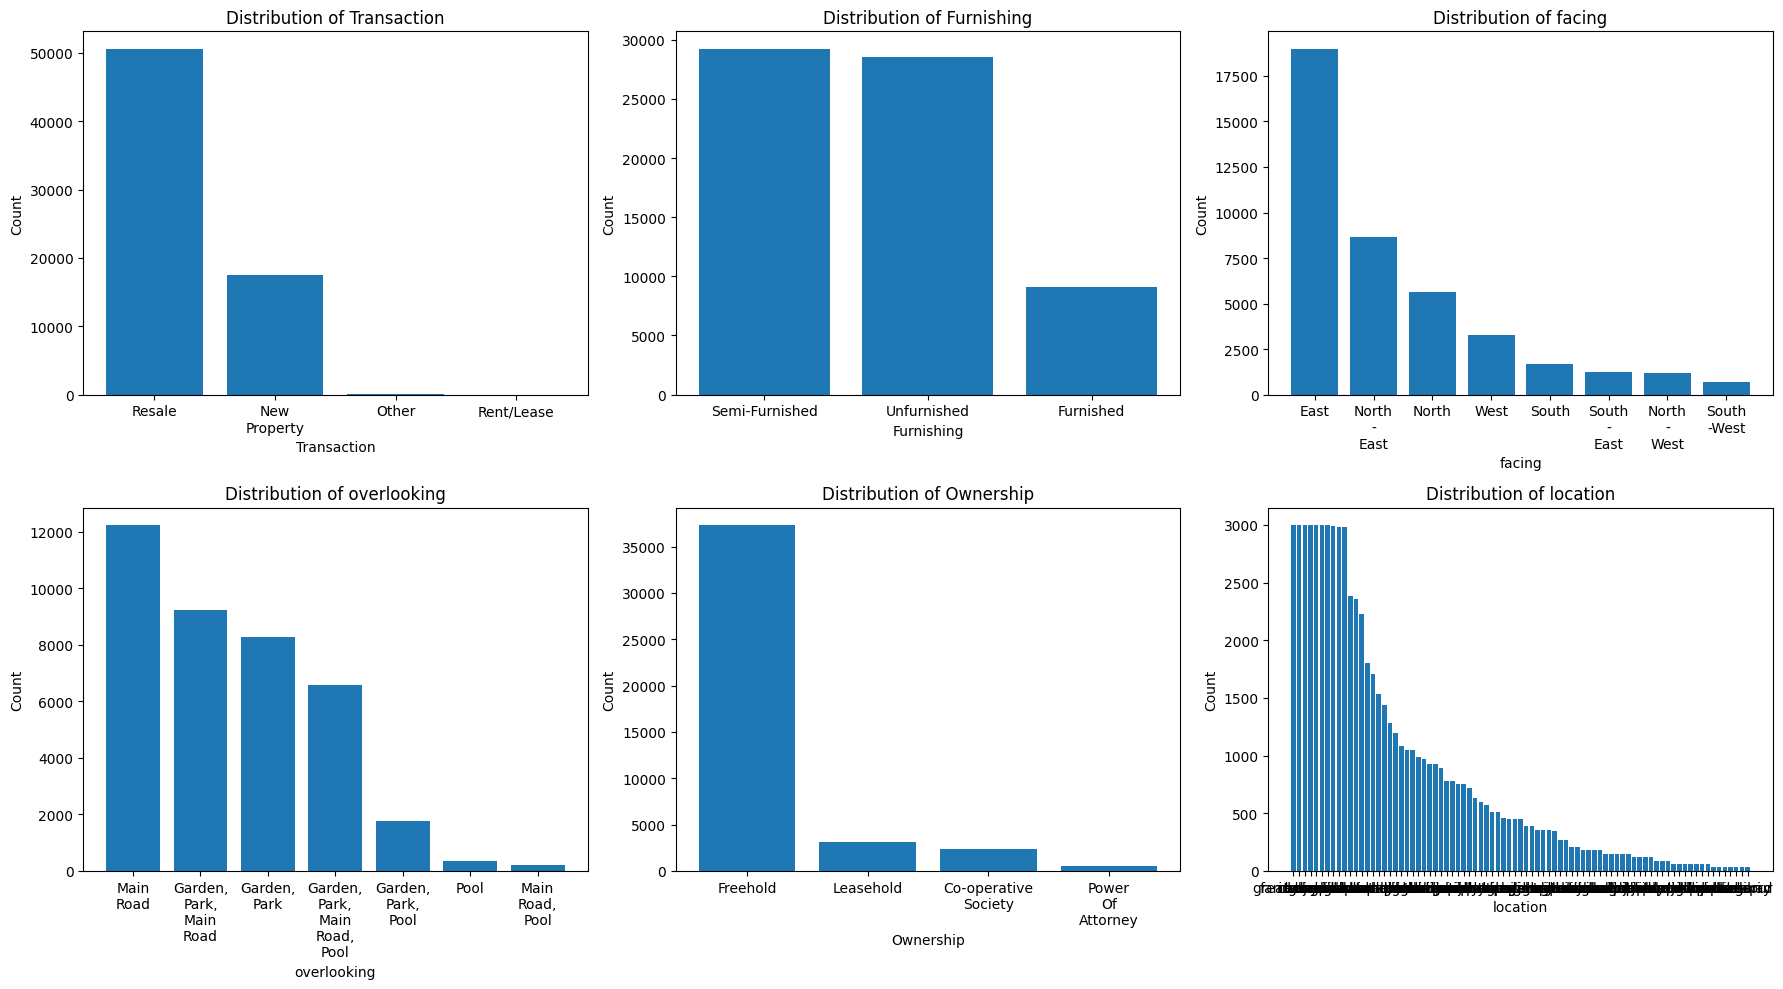

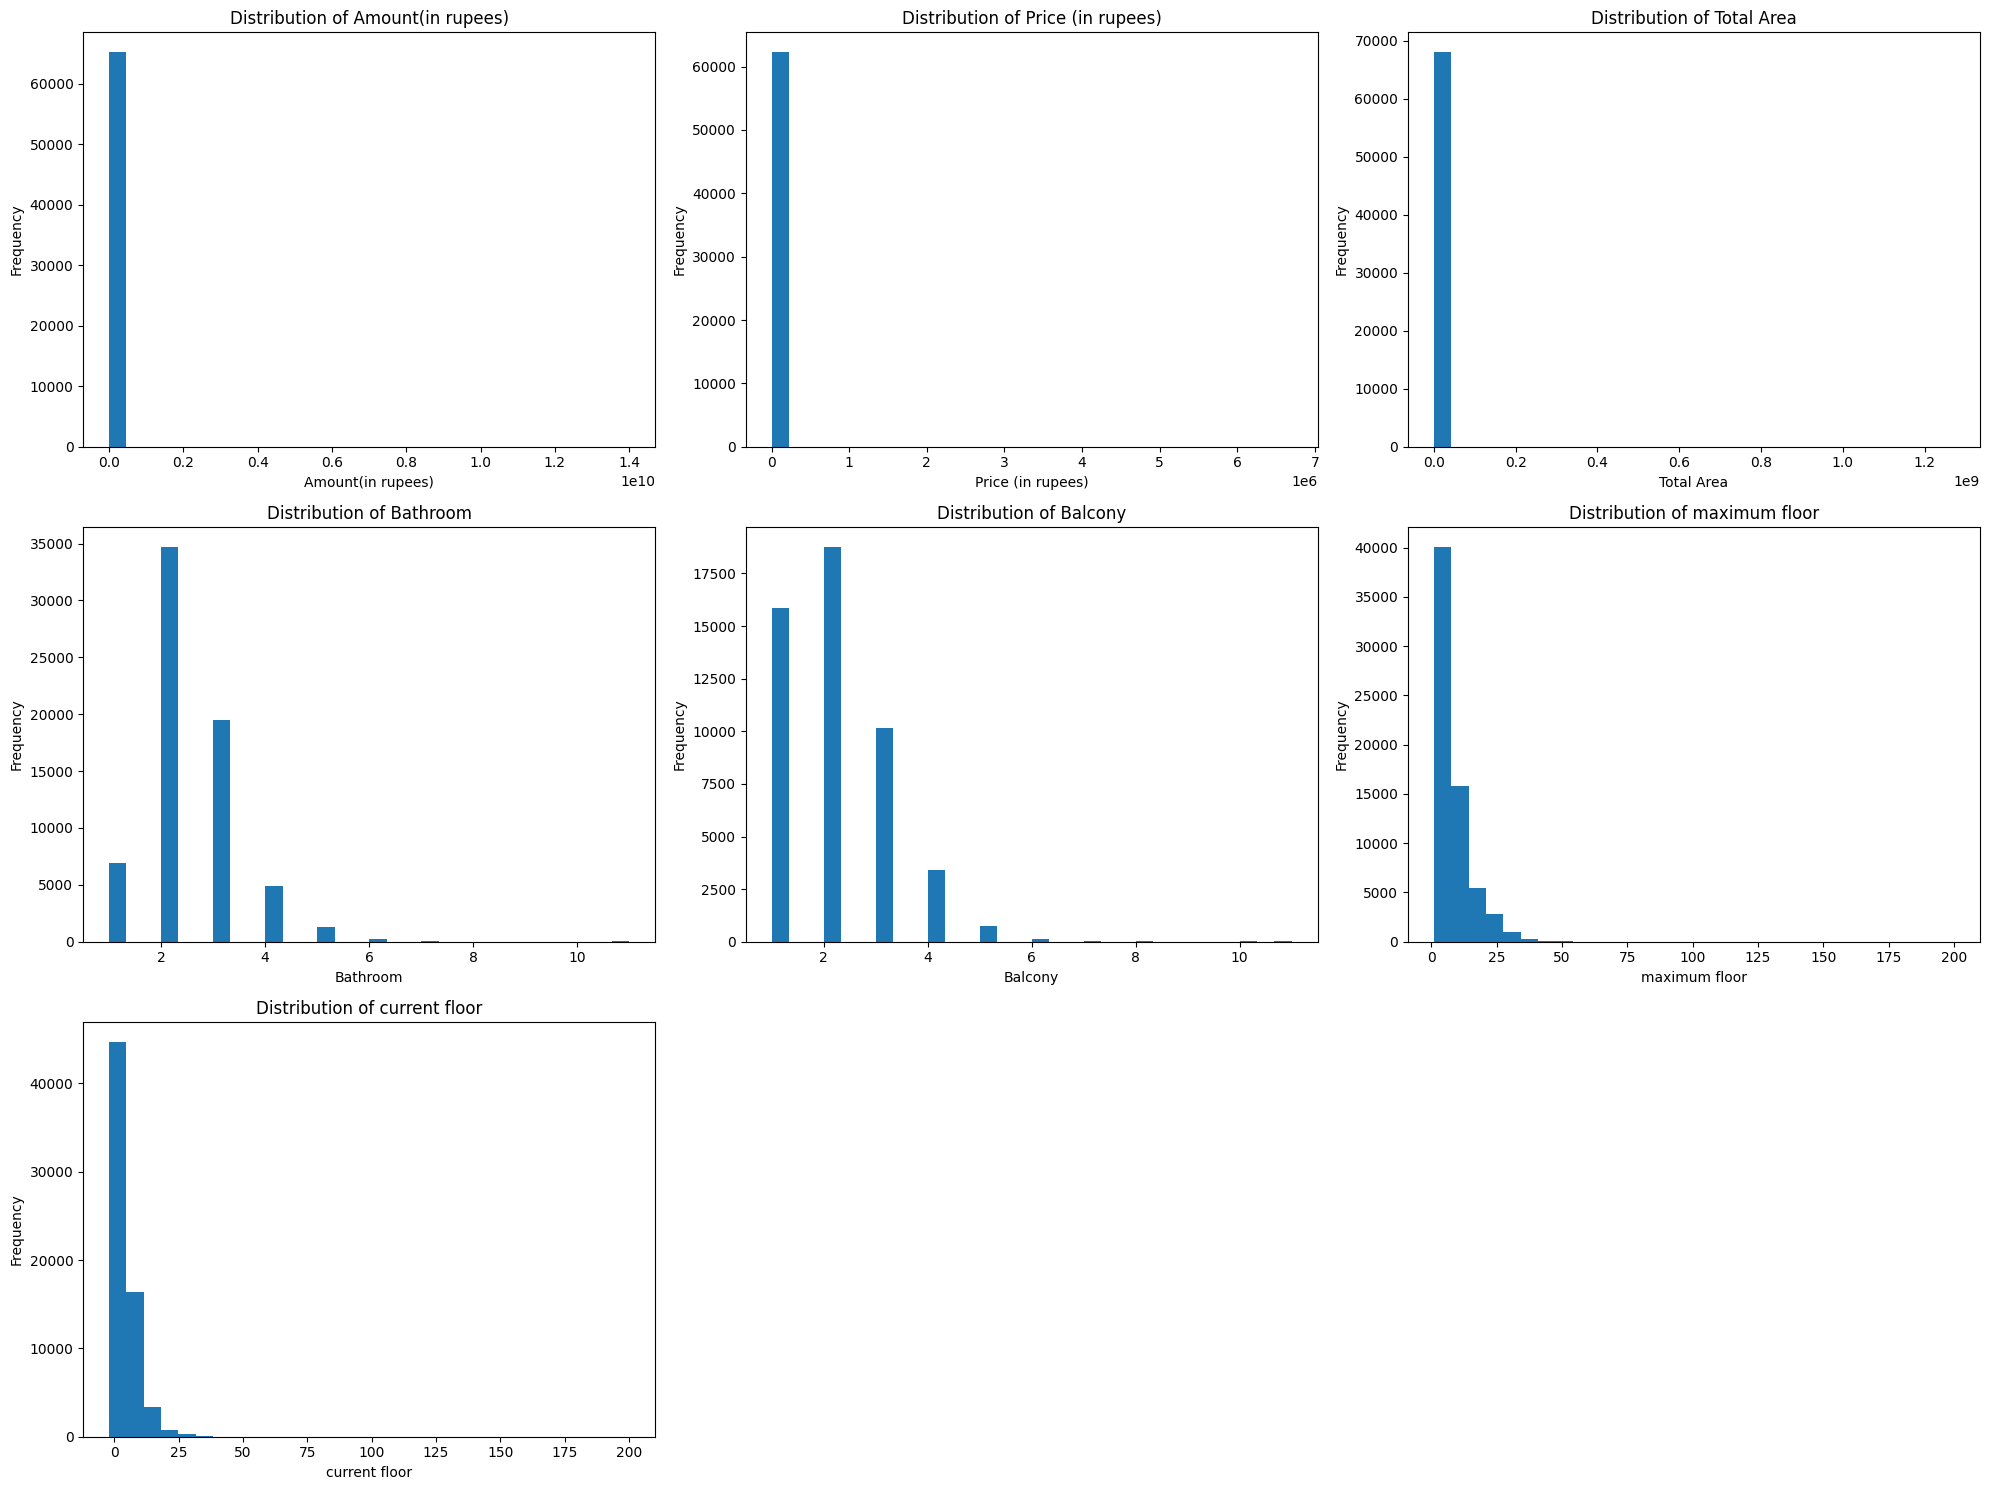

In [65]:
# @title Graphs Frequency


# # Univariate analysis - Numeric
# numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Total Area', 'Bathroom', 'Balcony','maximum floor','current floor']
# for column in numeric_columns:
#     print("Summary statistics for column:", column)
#     print(df[column].describe())
#     plt.figure(figsize=(10, 6))
#     plt.hist(df[column].dropna(), bins=30)
#     plt.title(f"Distribution of {column}")
#     plt.xlabel(column)
#     plt.ylabel("Frequency")
#     plt.show()

# # Univariate analysis - Categorical
# categorical_columns = ['Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership', 'location']
# for column in categorical_columns:
#     print(f"\nValue counts for column: {column}")
#     print(df[column].value_counts(dropna=False))
#     plt.figure(figsize=(10, 6))
#     df[column].value_counts(dropna=False).plot(kind='bar')
#     plt.title(f"Distribution of {column}")
#     plt.xlabel(column)
#     plt.ylabel("Count")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

import matplotlib.pyplot as plt

df=df_scaled.copy()


categorical_columns = ['Transaction', 'Furnishing', 'facing', 'overlooking', 'Ownership', 'location']
n = len(categorical_columns)
nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(18, 10))
axs = axs.flatten()

for idx, column in enumerate(categorical_columns):
    counts = df[column].value_counts(dropna=True)
    axs[idx].bar(counts.index.astype(str), counts.values)  # Faster than pandas plot
    axs[idx].set_title(f"Distribution of {column}")
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel("Count")
    # axs[idx].tick_params(axis='x', rotation=45)

    axs[idx].set_xticklabels(
        [label.get_text().replace(', ', ',').replace(',', ',\n').replace(' ', '\n') for label in axs[idx].get_xticklabels()]
    )

# Hide any unused axes
for idx in range(n, len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Total Area',
                   'Bathroom', 'Balcony', 'maximum floor', 'current floor']

n = len(numeric_columns)
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 15))
axs = axs.flatten()

for idx, column in enumerate(numeric_columns):
    # data = df[column].dropna()
    data = df[column].dropna().values.reshape(-1, 1)
    axs[idx].hist(data, bins=30)
    axs[idx].set_title(f"Distribution of {column}")
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel("Frequency")

    # Optionally print summary statistics
    # print(f"\nSummary statistics for column: {column}")
    # print(df[column].describe())

# Hide any unused subplots
for idx in range(n, len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


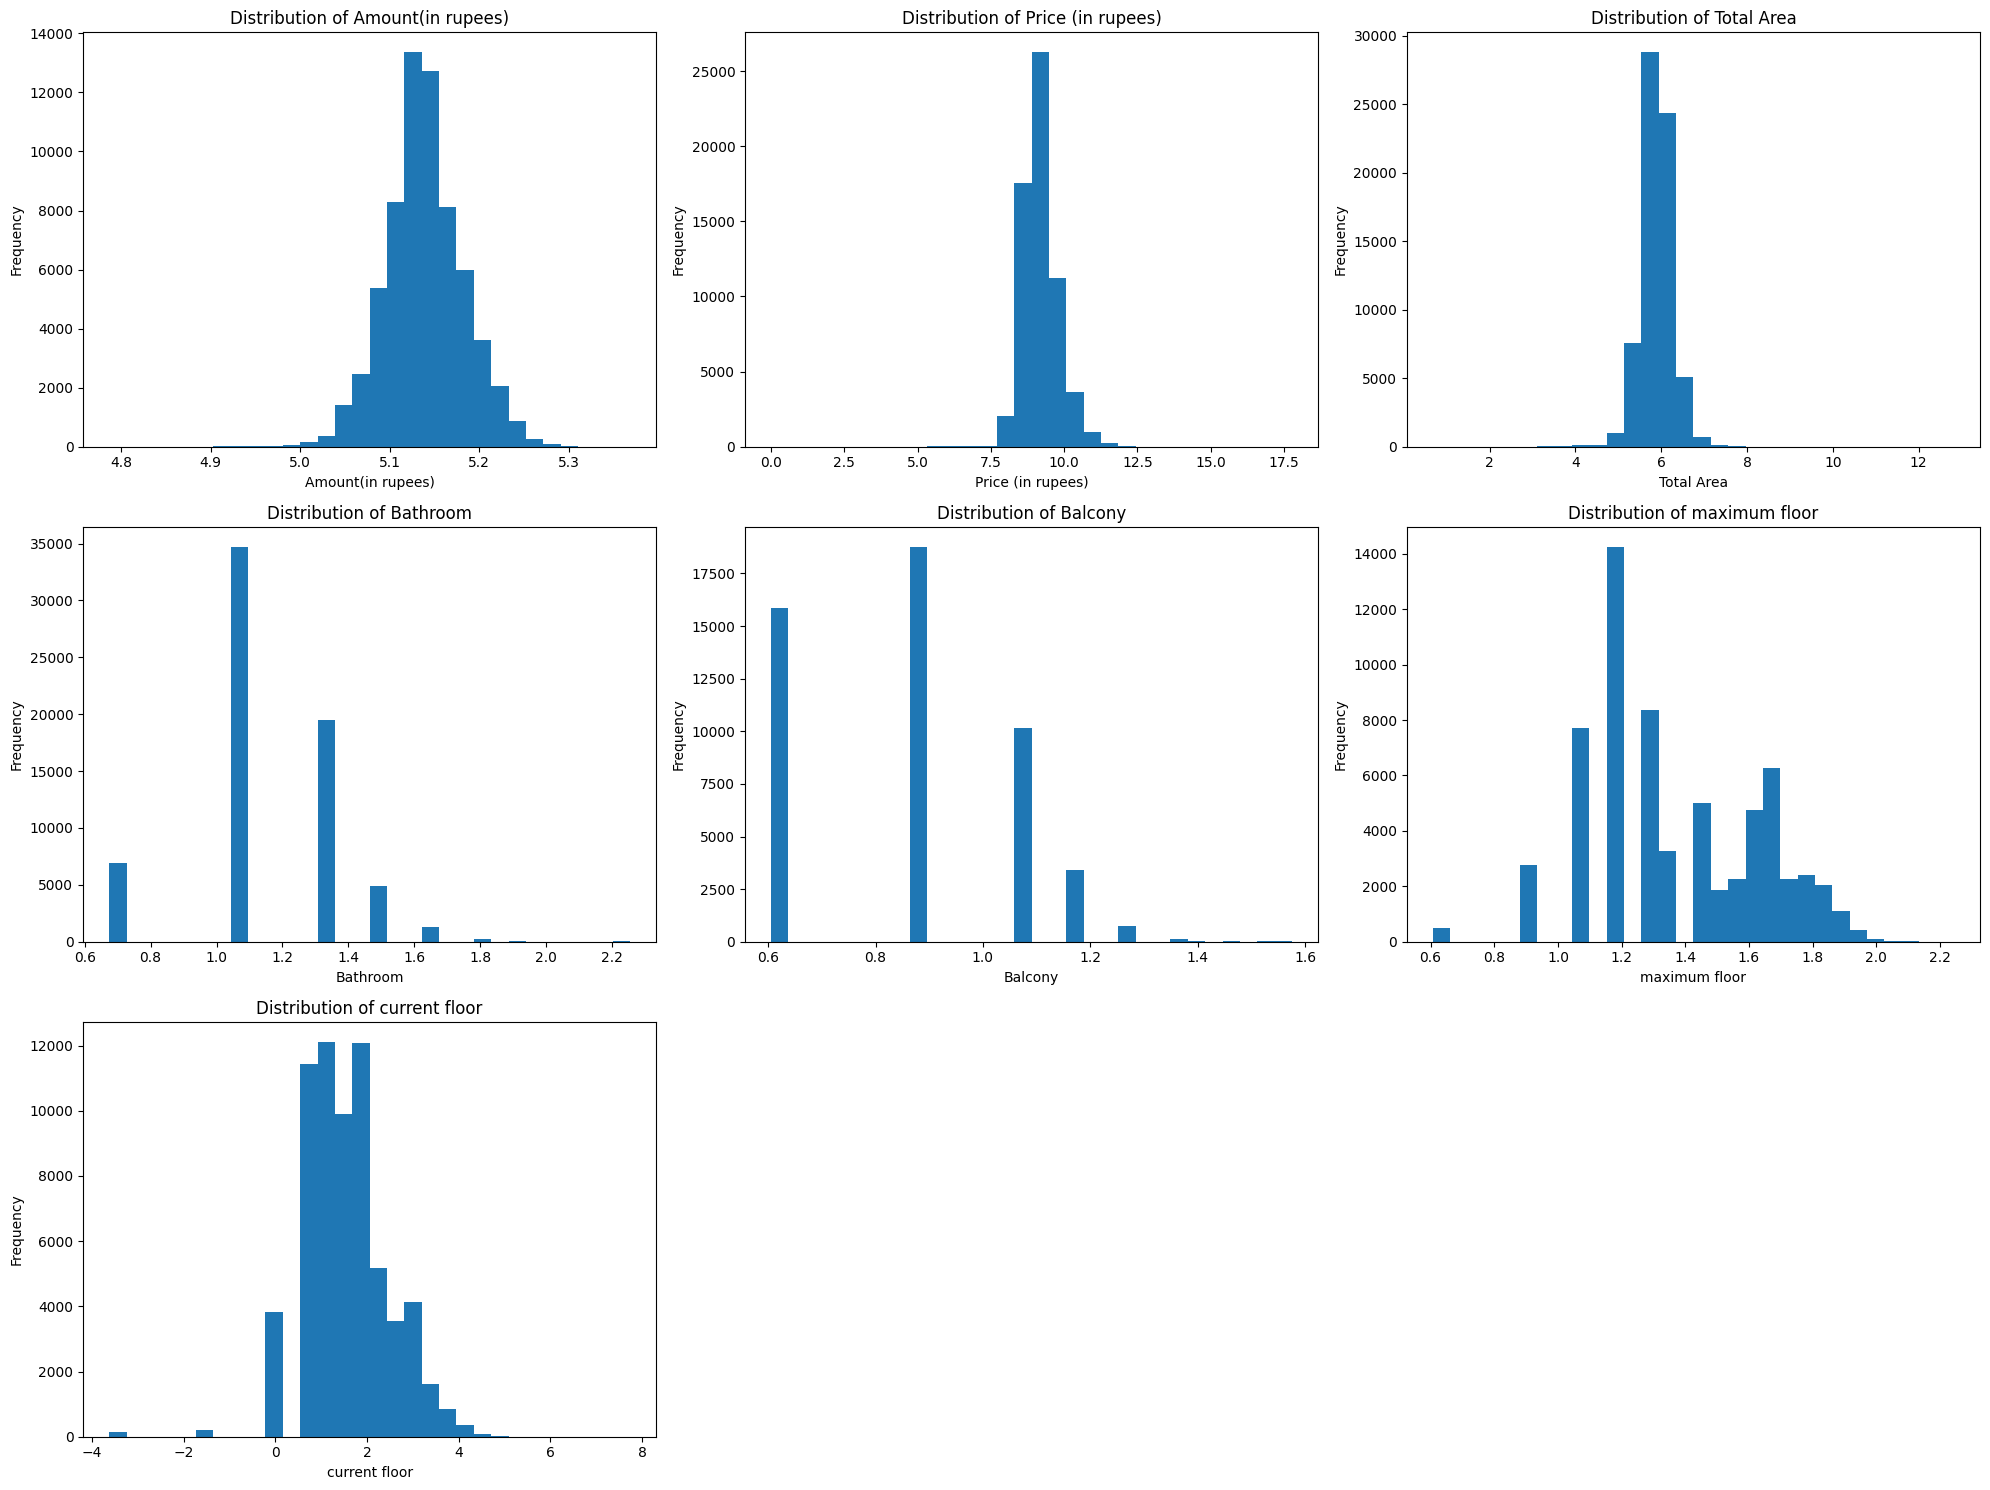

In [66]:
# @title Graph Frequency unskewing with Yeo Johnson

# # Numeric columns για unskewing
# numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Total Area',
#                    'Bathroom', 'Balcony', 'maximum floor', 'current floor']

# # Ο transformer για Yeo-Johnson
# transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# for column in numeric_columns:
#     plt.figure(figsize=(10, 6))

#     # Παίρνουμε τα δεδομένα, αγνοώντας NaN
#     data = df[column].dropna().values.reshape(-1, 1)

#     # Εφαρμογή Yeo-Johnson μετασχηματισμού
#     transformed = transformer.fit_transform(data).flatten()

#     # Plot του μετασχηματισμένου
#     plt.hist(transformed, bins=30)
#     plt.title(f"Yeo-Johnson Transformed Distribution of {column}")
#     plt.xlabel(f"{column} (Yeo-Johnson)")
#     plt.ylabel("Frequency")
#     plt.tight_layout()
#     plt.show()

numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Total Area',
                   'Bathroom', 'Balcony', 'maximum floor', 'current floor']

# Ο transformer για Yeo-Johnson
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

n = len(numeric_columns)
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 15))
axs = axs.flatten()

for idx, column in enumerate(numeric_columns):
    # Παίρνουμε τα δεδομένα, αγνοώντας NaN
    data = df[column].dropna().values.reshape(-1, 1)

    # Εφαρμογή Yeo-Johnson μετασχηματισμού
    transformed = transformer.fit_transform(data).flatten()

    axs[idx].hist(transformed, bins=30)
    axs[idx].set_title(f"Distribution of {column}")
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel("Frequency")

    # Optionally print summary statistics
    # print(f"\nSummary statistics for column: {column}")
    # print(df[column].describe())

# Hide any unused subplots
for idx in range(n, len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()

<ipython-input-67-cf0ec96641fd>:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-67-cf0ec96641fd>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-67-cf0ec96641fd>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-67-cf0ec96641fd>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-67-cf0ec96641fd>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
<ipython-input-67-cf0ec96641fd>:58: UserWarning: set_ticklabels() shou

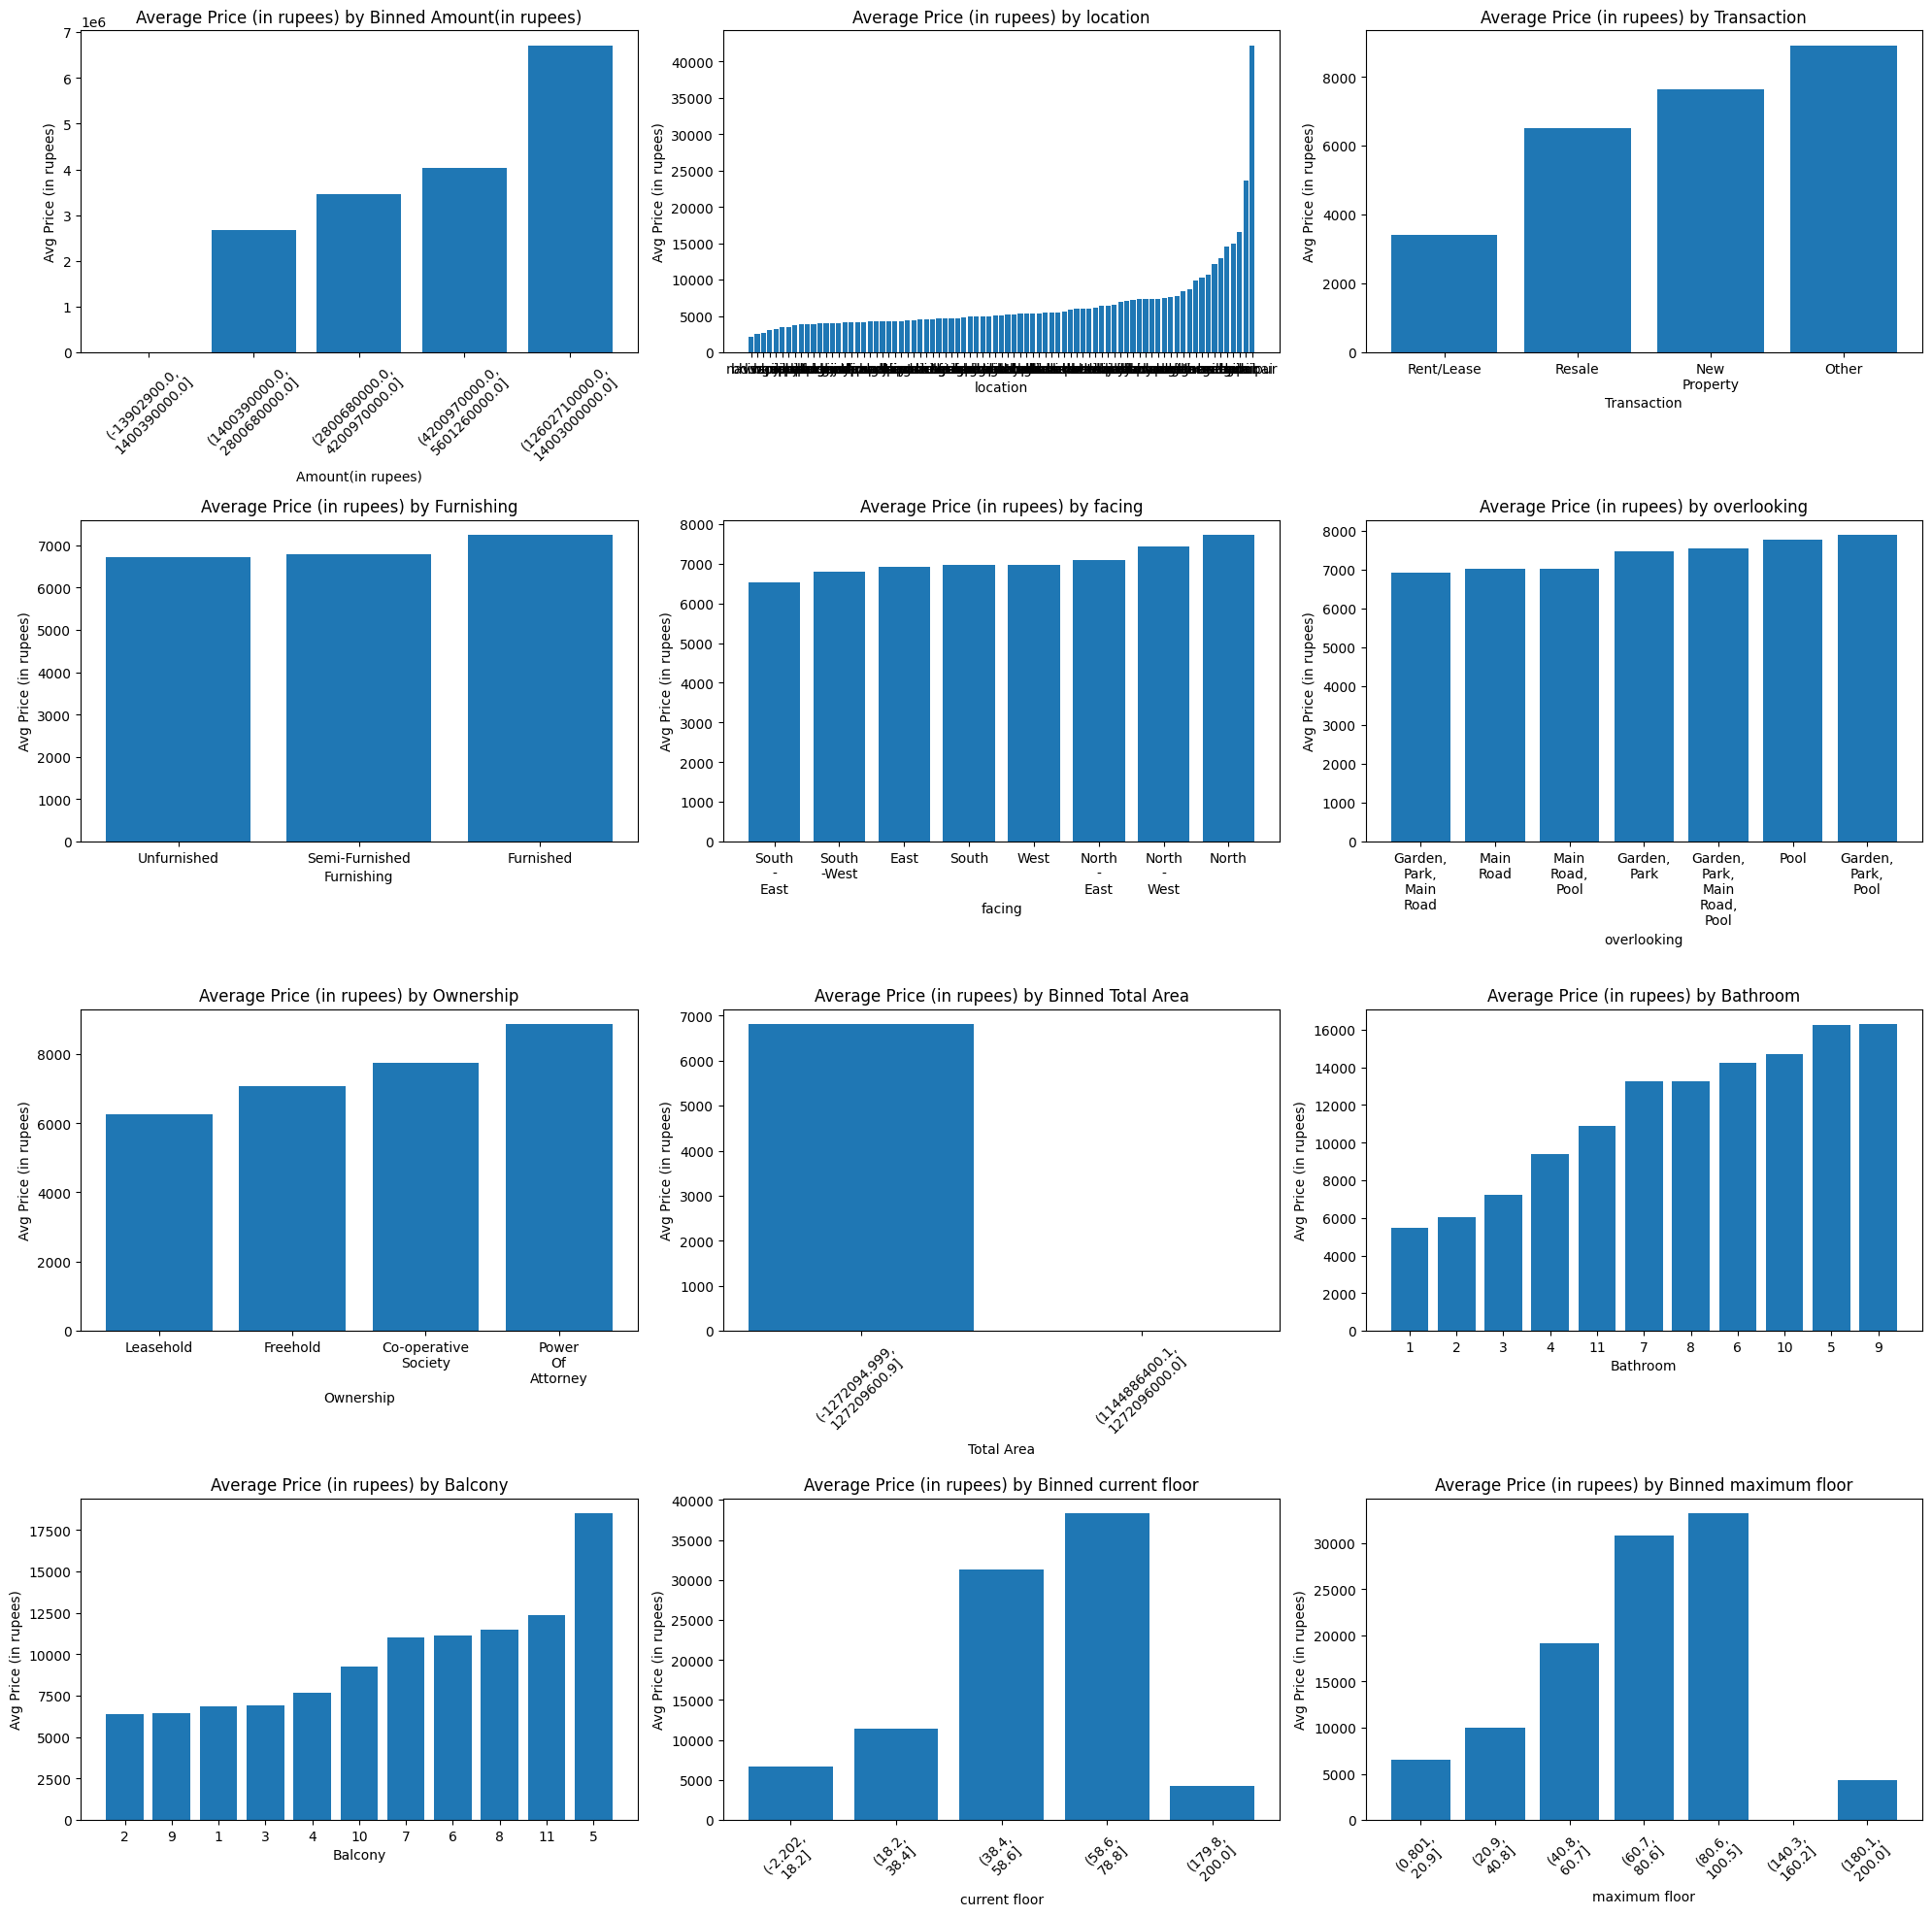

In [67]:
# @title GRAPHS Average Price with FEATURES
# # ===== Plotting =====
# target_column = 'Price (in rupees)'
# features = ['Amount(in rupees)', 'location', 'Transaction', 'Furnishing',
#             'facing', 'overlooking', 'Ownership', 'Total Area',
#             'Bathroom', 'Balcony', 'current floor','maximum floor']

# for column in features:
#     plt.figure(figsize=(12, 6))

#     if df[column].dtype == 'object' or df[column].nunique() < 20:
#         mean_price = df.groupby(column)[target_column].mean().sort_values()

#         mean_price.plot(kind='bar')
#         plt.title(f"Average {target_column} by {column}")
#         plt.ylabel(f"Average {target_column}")
#         plt.xlabel(column)
#         plt.xticks(rotation=45)

#     else:
#         # Για αριθμητικά: κάνε binning
#         binned = pd.cut(df[column], bins=10)
#         #mean_price = df.groupby(binned)[target_column].mean() warning
#         mean_price = df.groupby(binned, observed=True)[target_column].mean() # without warning
#         mean_price.plot(kind='bar')
#         plt.title(f"Average {target_column} by Binned {column}")
#         plt.ylabel(f"Average {target_column}")
#         plt.xlabel(column)
#         plt.xticks(rotation=45)

#     plt.tight_layout()
#     plt.show()


import matplotlib.pyplot as plt
import pandas as pd

target_column = 'Price (in rupees)'
features = ['Amount(in rupees)', 'location', 'Transaction', 'Furnishing',
            'facing', 'overlooking', 'Ownership', 'Total Area',
            'Bathroom', 'Balcony', 'current floor', 'maximum floor']

# Configure subplot layout
ncols = 3
nrows = (len(features) + ncols - 1) // ncols  # Automatically compute rows needed
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axs = axs.flatten()

for idx, column in enumerate(features):
    ax = axs[idx]

    if df[column].dtype == 'object' or df[column].nunique() < 20:
        mean_price = df.groupby(column)[target_column].mean().sort_values()
        ax.bar(mean_price.index.astype(str), mean_price.values)
        ax.set_title(f"Average {target_column} by {column}")
        ax.set_xlabel(column)
        ax.set_ylabel(f"Avg {target_column}")
        ax.set_xticklabels(
            [str(label).replace(', ', ',').replace(',', ',\n').replace(' ', '\n') for label in mean_price.index],
            rotation=0
        )
    else:
        binned = pd.cut(df[column], bins=10)
        mean_price = df.groupby(binned, observed=True)[target_column].mean()
        ax.bar(mean_price.index.astype(str), mean_price.values)
        ax.set_title(f"Average {target_column} by Binned {column}")
        ax.set_xlabel(column)
        ax.set_ylabel(f"Avg {target_column}")
        ax.set_xticklabels(
            [str(label).replace(', ', ',').replace(',', ',\n').replace(' ', '\n') for label in mean_price.index],
            rotation=45
        )

# Remove unused subplots
for idx in range(len(features), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


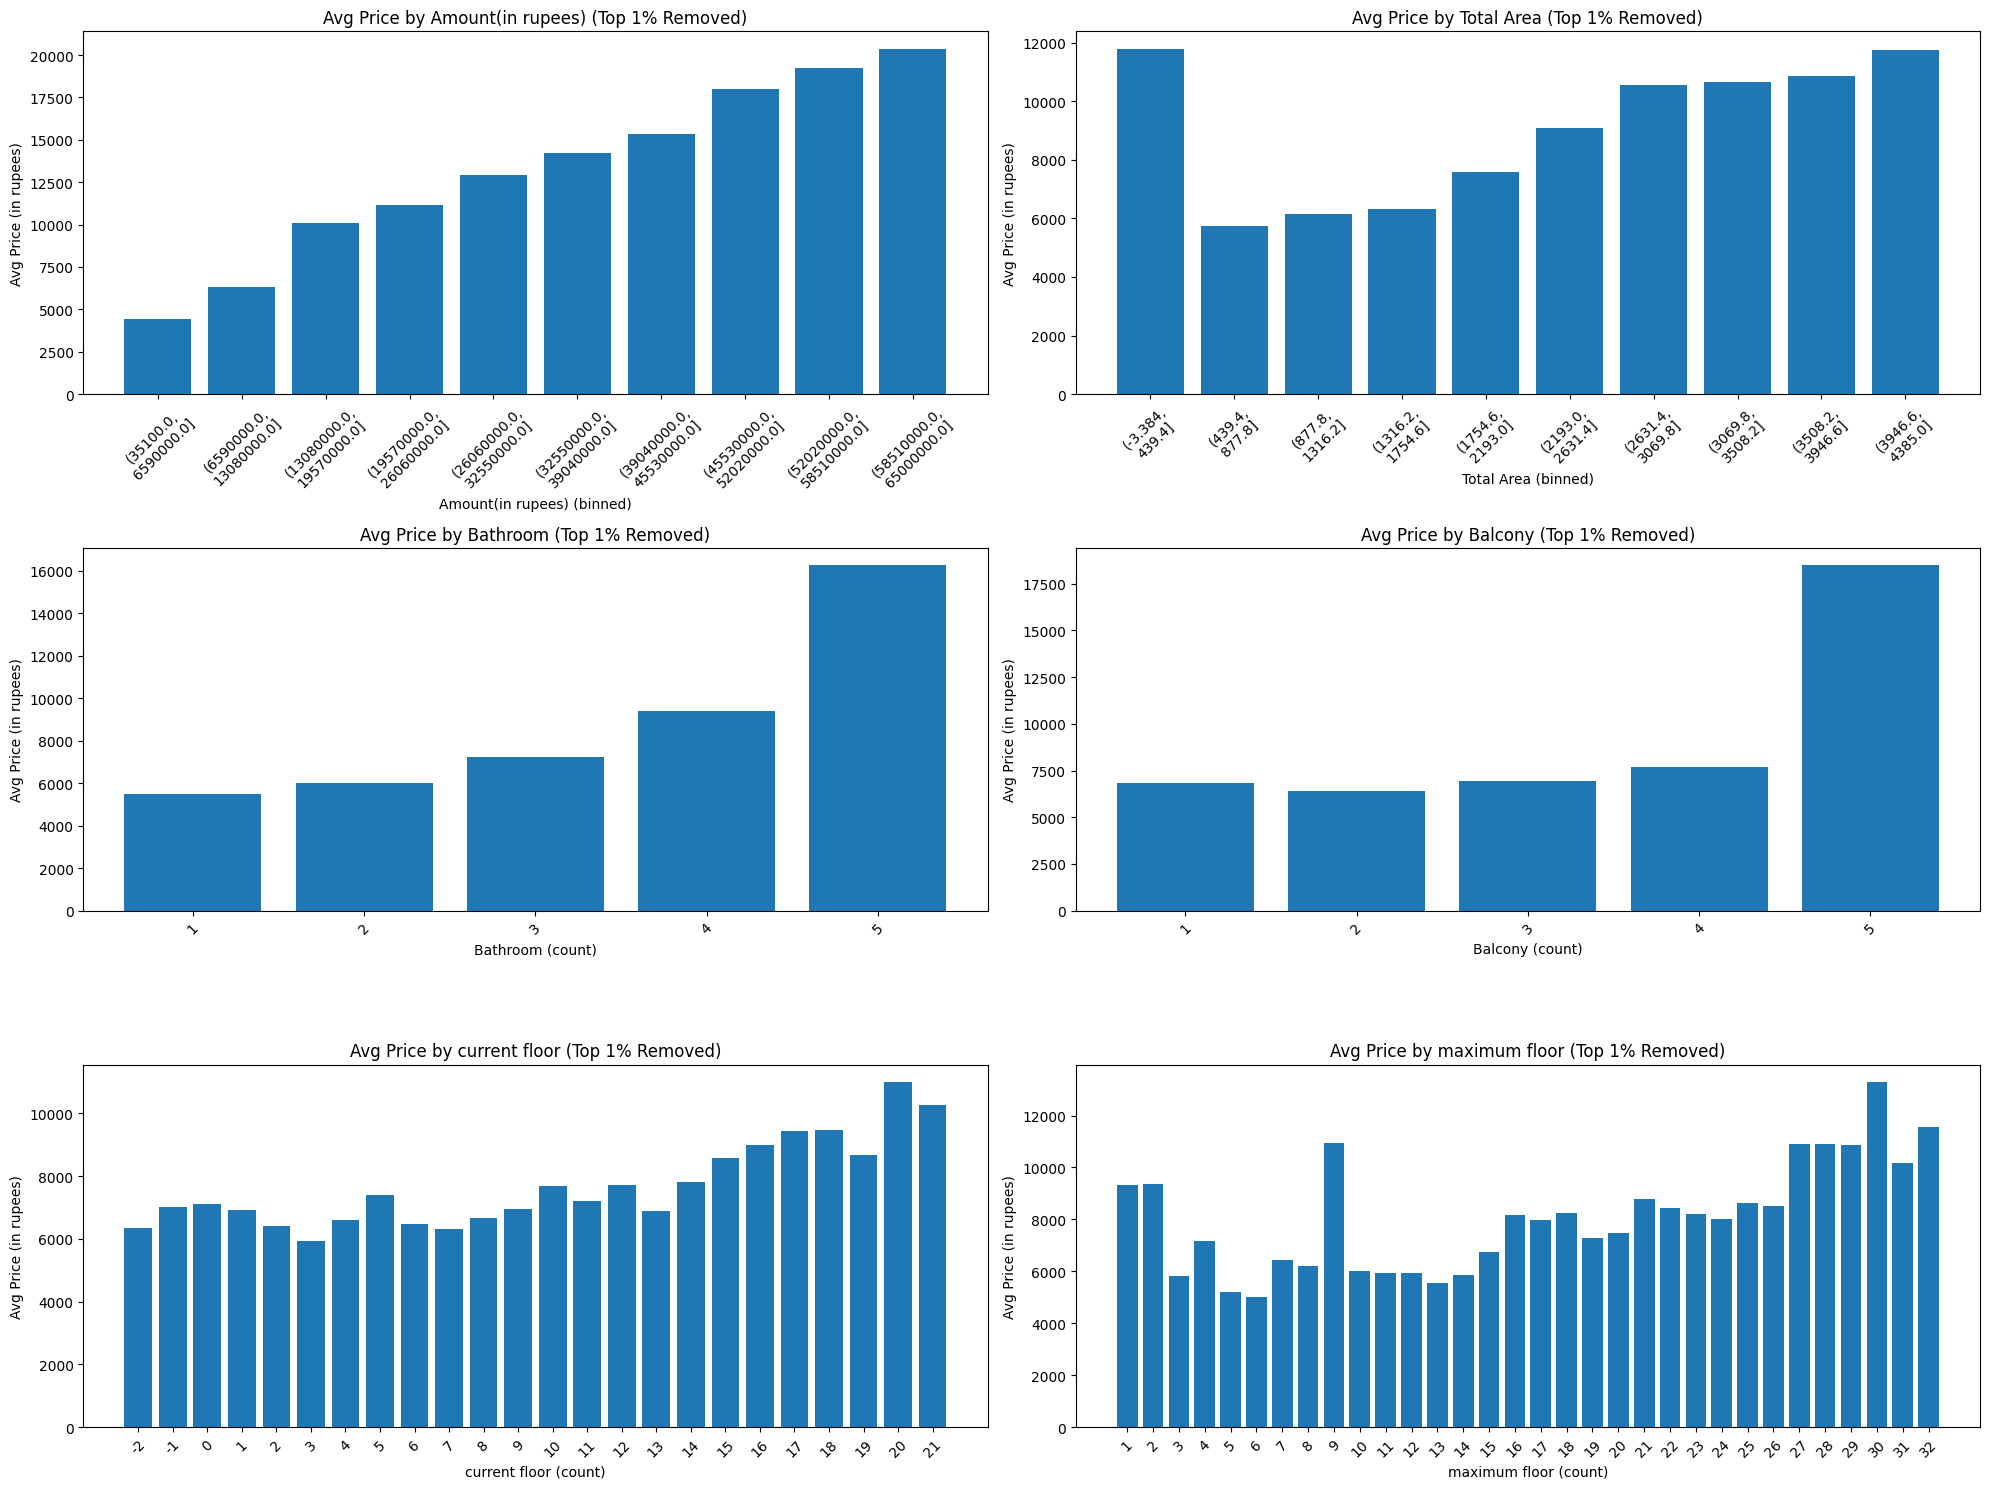

In [68]:
# @title GRAPHS Average Price with FEATURES without TOP 1%

# target_column = 'Price (in rupees)'
# features = ['Amount(in rupees)', 'Total Area', 'Bathroom', 'Balcony', 'current floor','maximum floor']

# # Features to group by as integers directly
# integer_bucket_features = ['Bathroom', 'Balcony', 'current floor','maximum floor']

# for column in features:
#     plt.figure(figsize=(12, 6))

#     # Drop missing values and remove top 1% outliers
#     filtered = df[[column, target_column]].dropna()
#     threshold = filtered[column].quantile(0.99)
#     filtered = filtered[filtered[column] <= threshold]

#     if column in integer_bucket_features:
#         # Round or convert to int, then group
#         filtered[column] = filtered[column].astype(int)
#         mean_price = filtered.groupby(column)[target_column].mean().sort_index()
#         x_label = f"{column} (count)"
#     else:
#         # Bin into 10 equal-width bins for continuous features
#         binned = pd.cut(filtered[column], bins=10)
#         #mean_price = filtered.groupby(binned)[target_column].mean().sort_index() warning
#         mean_price = filtered.groupby(binned, observed=True)[target_column].mean().sort_index() #without warnings
#         x_label = f"{column} (binned)"

#     # Plot and add labels
#     ax = mean_price.plot(kind='bar')
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%.0f', padding=3)

#     plt.title(f"Average Price by {column} (Top 1% Removed)")
#     plt.xlabel(x_label)
#     plt.ylabel("Average Price (in rupees)")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


import matplotlib.pyplot as plt
import pandas as pd

target_column = 'Price (in rupees)'
features = ['Amount(in rupees)', 'Total Area', 'Bathroom', 'Balcony', 'current floor', 'maximum floor']
integer_bucket_features = ['Bathroom', 'Balcony', 'current floor', 'maximum floor']

# Subplot grid
ncols = 2
nrows = (len(features) + ncols - 1) // ncols
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axs = axs.flatten()

for idx, column in enumerate(features):
    ax = axs[idx]

    # Drop missing values and remove top 1% outliers
    filtered = df[[column, target_column]].dropna()
    threshold = filtered[column].quantile(0.99)
    filtered = filtered[filtered[column] <= threshold]

    if column in integer_bucket_features:
        filtered[column] = filtered[column].astype(int)
        mean_price = filtered.groupby(column)[target_column].mean().sort_index()
        x_label = f"{column} (count)"
        x_ticks = mean_price.index.astype(str)
    else:
        binned = pd.cut(filtered[column], bins=10)
        mean_price = filtered.groupby(binned, observed=True)[target_column].mean().sort_index()
        x_label = f"{column} (binned)"
        x_ticks = [str(label).replace(', ', ',').replace(',', ',\n').replace(' ', '\n') for label in mean_price.index]

    ax.bar(x_ticks, mean_price.values)
    ax.set_title(f"Avg Price by {column} (Top 1% Removed)")
    ax.set_xlabel(x_label)
    ax.set_ylabel("Avg Price (in rupees)")
    ax.tick_params(axis='x', rotation=45)

# Remove unused axes
for idx in range(len(features), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


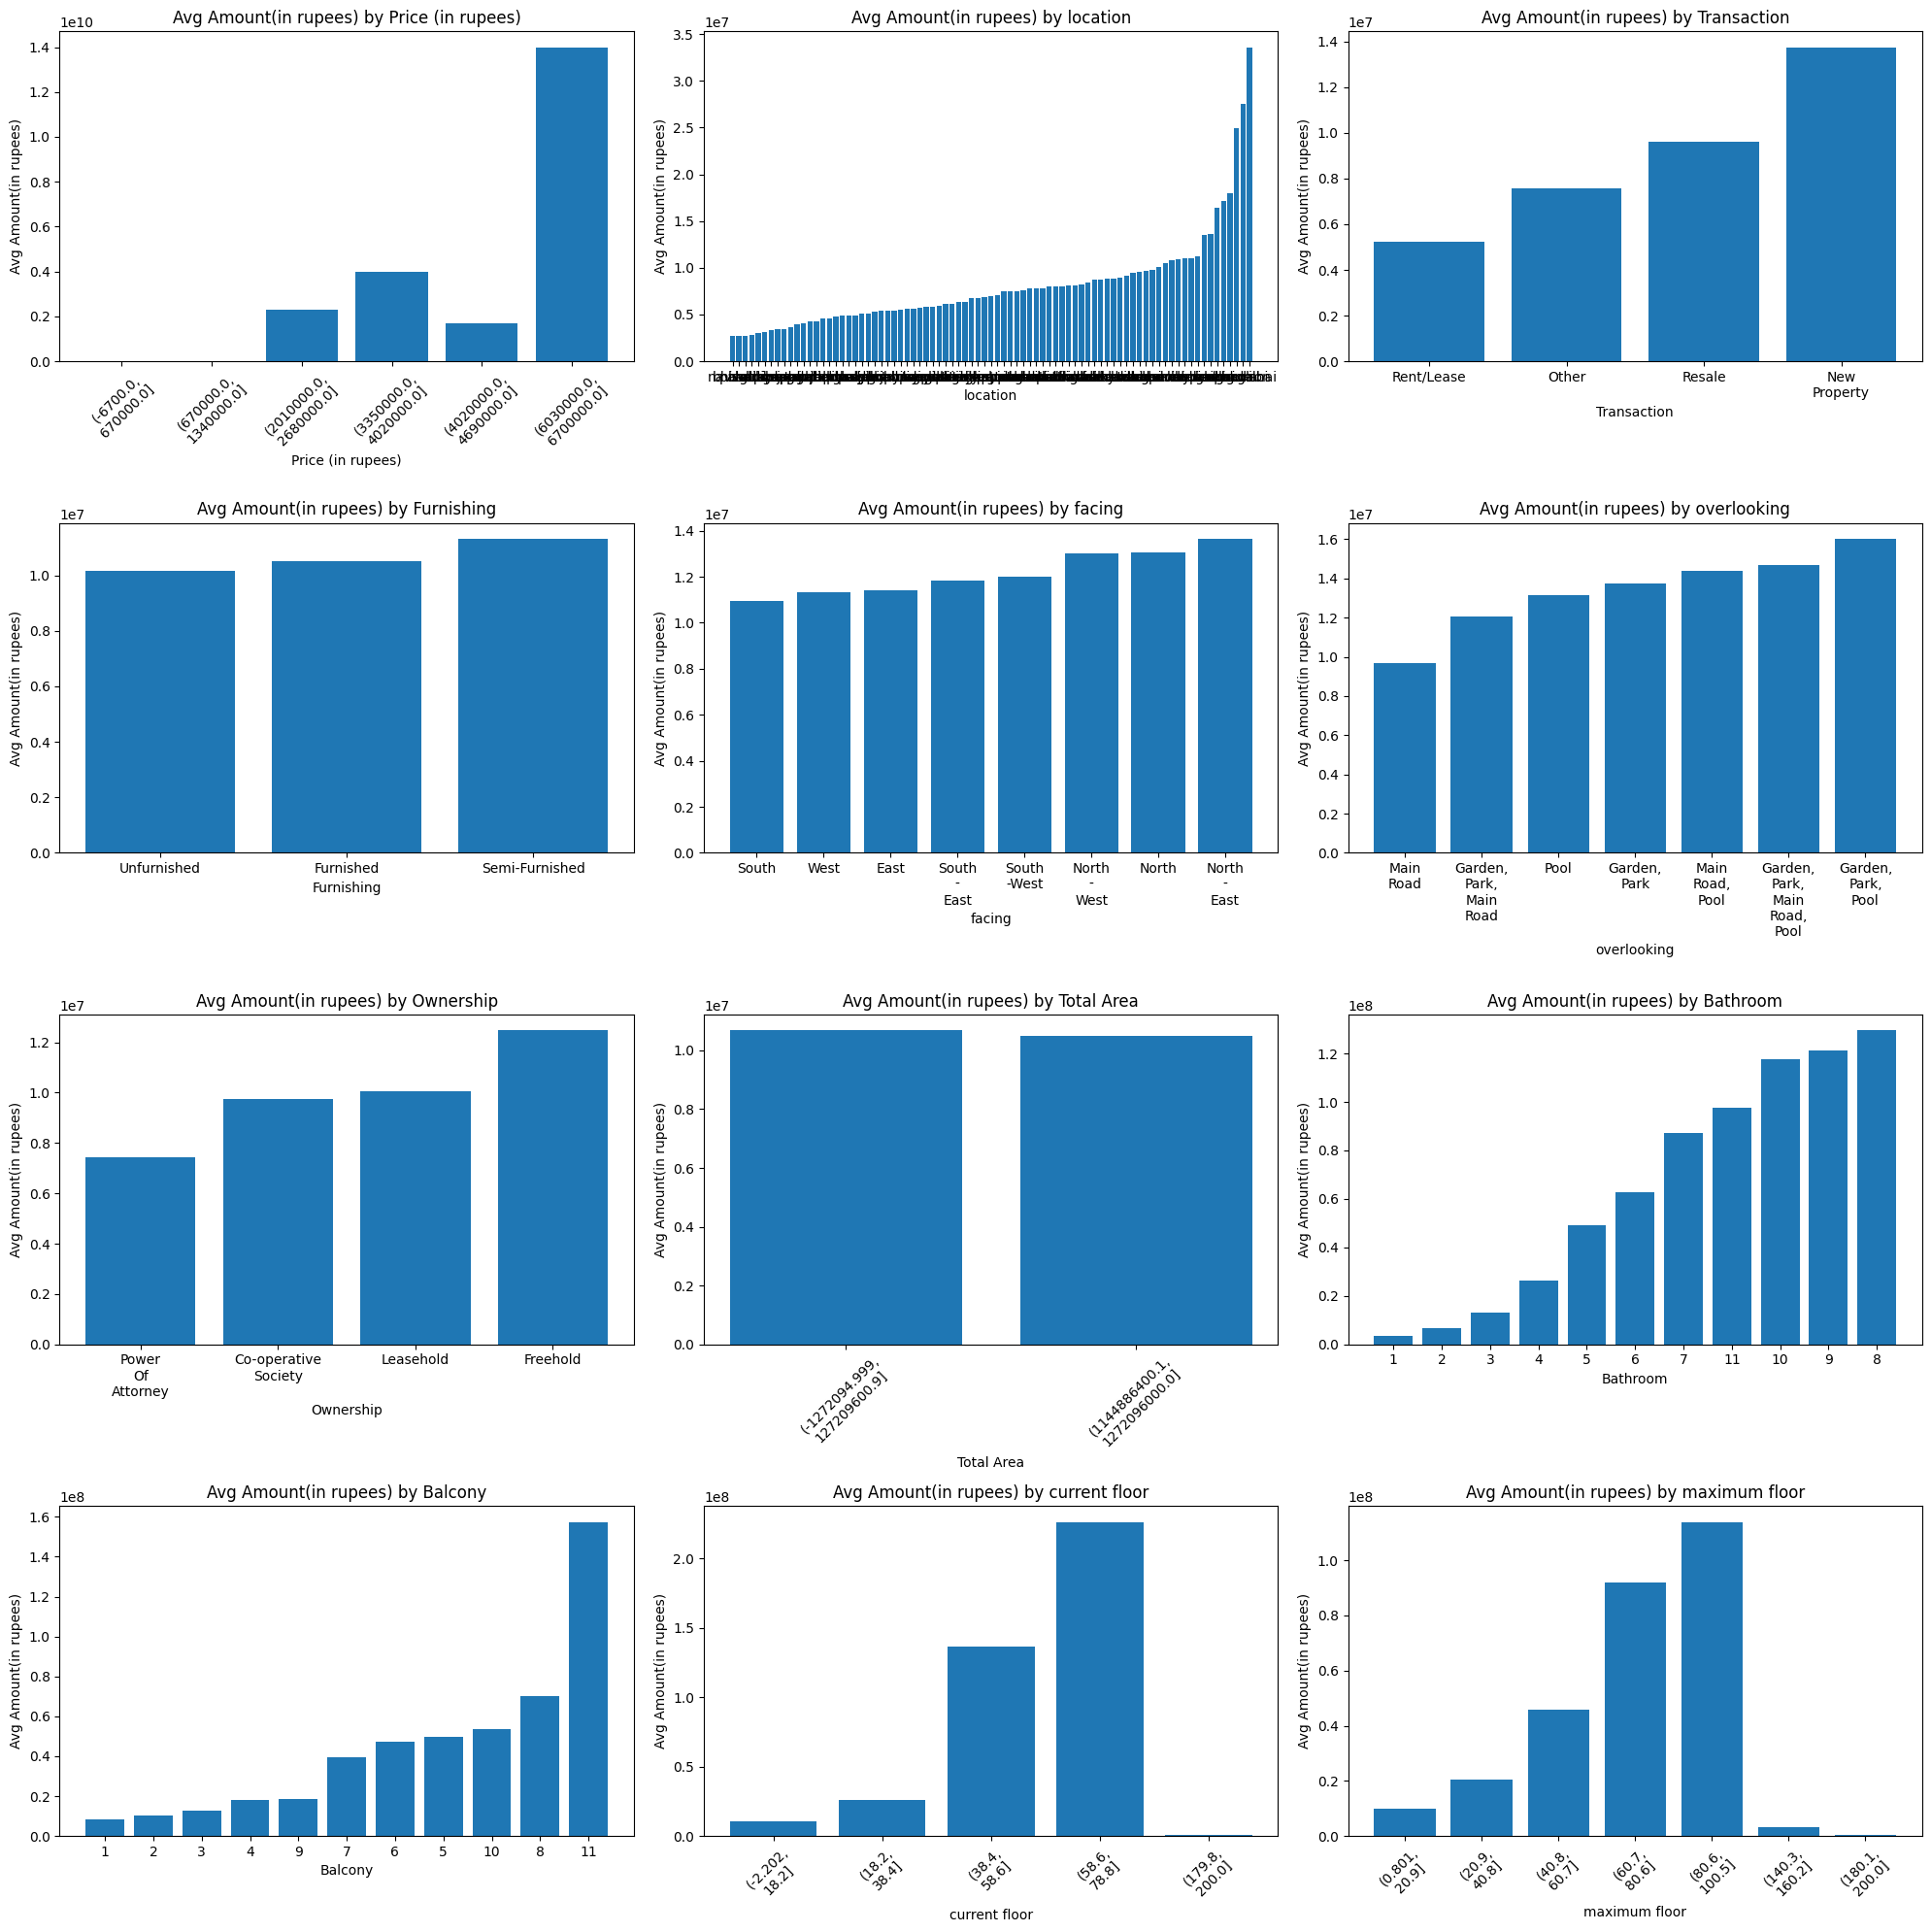

In [69]:
# @title GRAPHS Average Amount with FEATURES
# # ===== Plotting =====
# target_column = 'Amount(in rupees)'
# features = ['Price (in rupees)', 'location', 'Transaction', 'Furnishing',
#             'facing', 'overlooking', 'Ownership', 'Total Area',
#             'Bathroom', 'Balcony', 'current floor','maximum floor']

# for column in features:
#     plt.figure(figsize=(12, 6))

#     if df[column].dtype == 'object' or df[column].nunique() < 20:
#         mean_price = df.groupby(column)[target_column].mean().sort_values()

#         mean_price.plot(kind='bar')
#         plt.title(f"Average {target_column} by {column}")
#         plt.ylabel(f"Average {target_column}")
#         plt.xlabel(column)
#         plt.xticks(rotation=45)

#     else:
#         # Για αριθμητικά: κάνε binning
#         binned = pd.cut(df[column], bins=10)
#        # mean_price = df.groupby(binned)[target_column].mean() warning
#         mean_price = df.groupby(binned, observed=True)[target_column].mean() #without warnings
#         mean_price.plot(kind='bar')
#         plt.title(f"Average {target_column} by Binned {column}")
#         plt.ylabel(f"Average {target_column}")
#         plt.xlabel(column)
#         plt.xticks(rotation=45)

#     plt.tight_layout()
#     plt.show()


import matplotlib.pyplot as plt
import pandas as pd

target_column = 'Amount(in rupees)'
features = ['Price (in rupees)', 'location', 'Transaction', 'Furnishing',
            'facing', 'overlooking', 'Ownership', 'Total Area',
            'Bathroom', 'Balcony', 'current floor', 'maximum floor']

# Subplot grid setup
ncols = 3
nrows = (len(features) + ncols - 1) // ncols
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axs = axs.flatten()

for idx, column in enumerate(features):
    ax = axs[idx]

    if df[column].dtype == 'object' or df[column].nunique() < 20:
        mean_price = df.groupby(column)[target_column].mean().sort_values()
        # x_ticks = mean_price.index.astype(str)
        x_ticks = [str(label).replace(', ', ',').replace(',', ',\n').replace(' ', '\n') for label in mean_price.index]

    else:
        binned = pd.cut(df[column], bins=10)
        mean_price = df.groupby(binned, observed=True)[target_column].mean().sort_index()
        x_ticks = [str(label).replace(', ', ',').replace(',', ',\n').replace(' ', '\n') for label in mean_price.index]
        ax.tick_params(axis='x', rotation=45)


    ax.bar(x_ticks, mean_price.values)
    ax.set_title(f"Avg {target_column} by {column}")
    ax.set_xlabel(column)
    ax.set_ylabel(f"Avg {target_column}")

# Remove any unused subplots
for idx in range(len(features), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


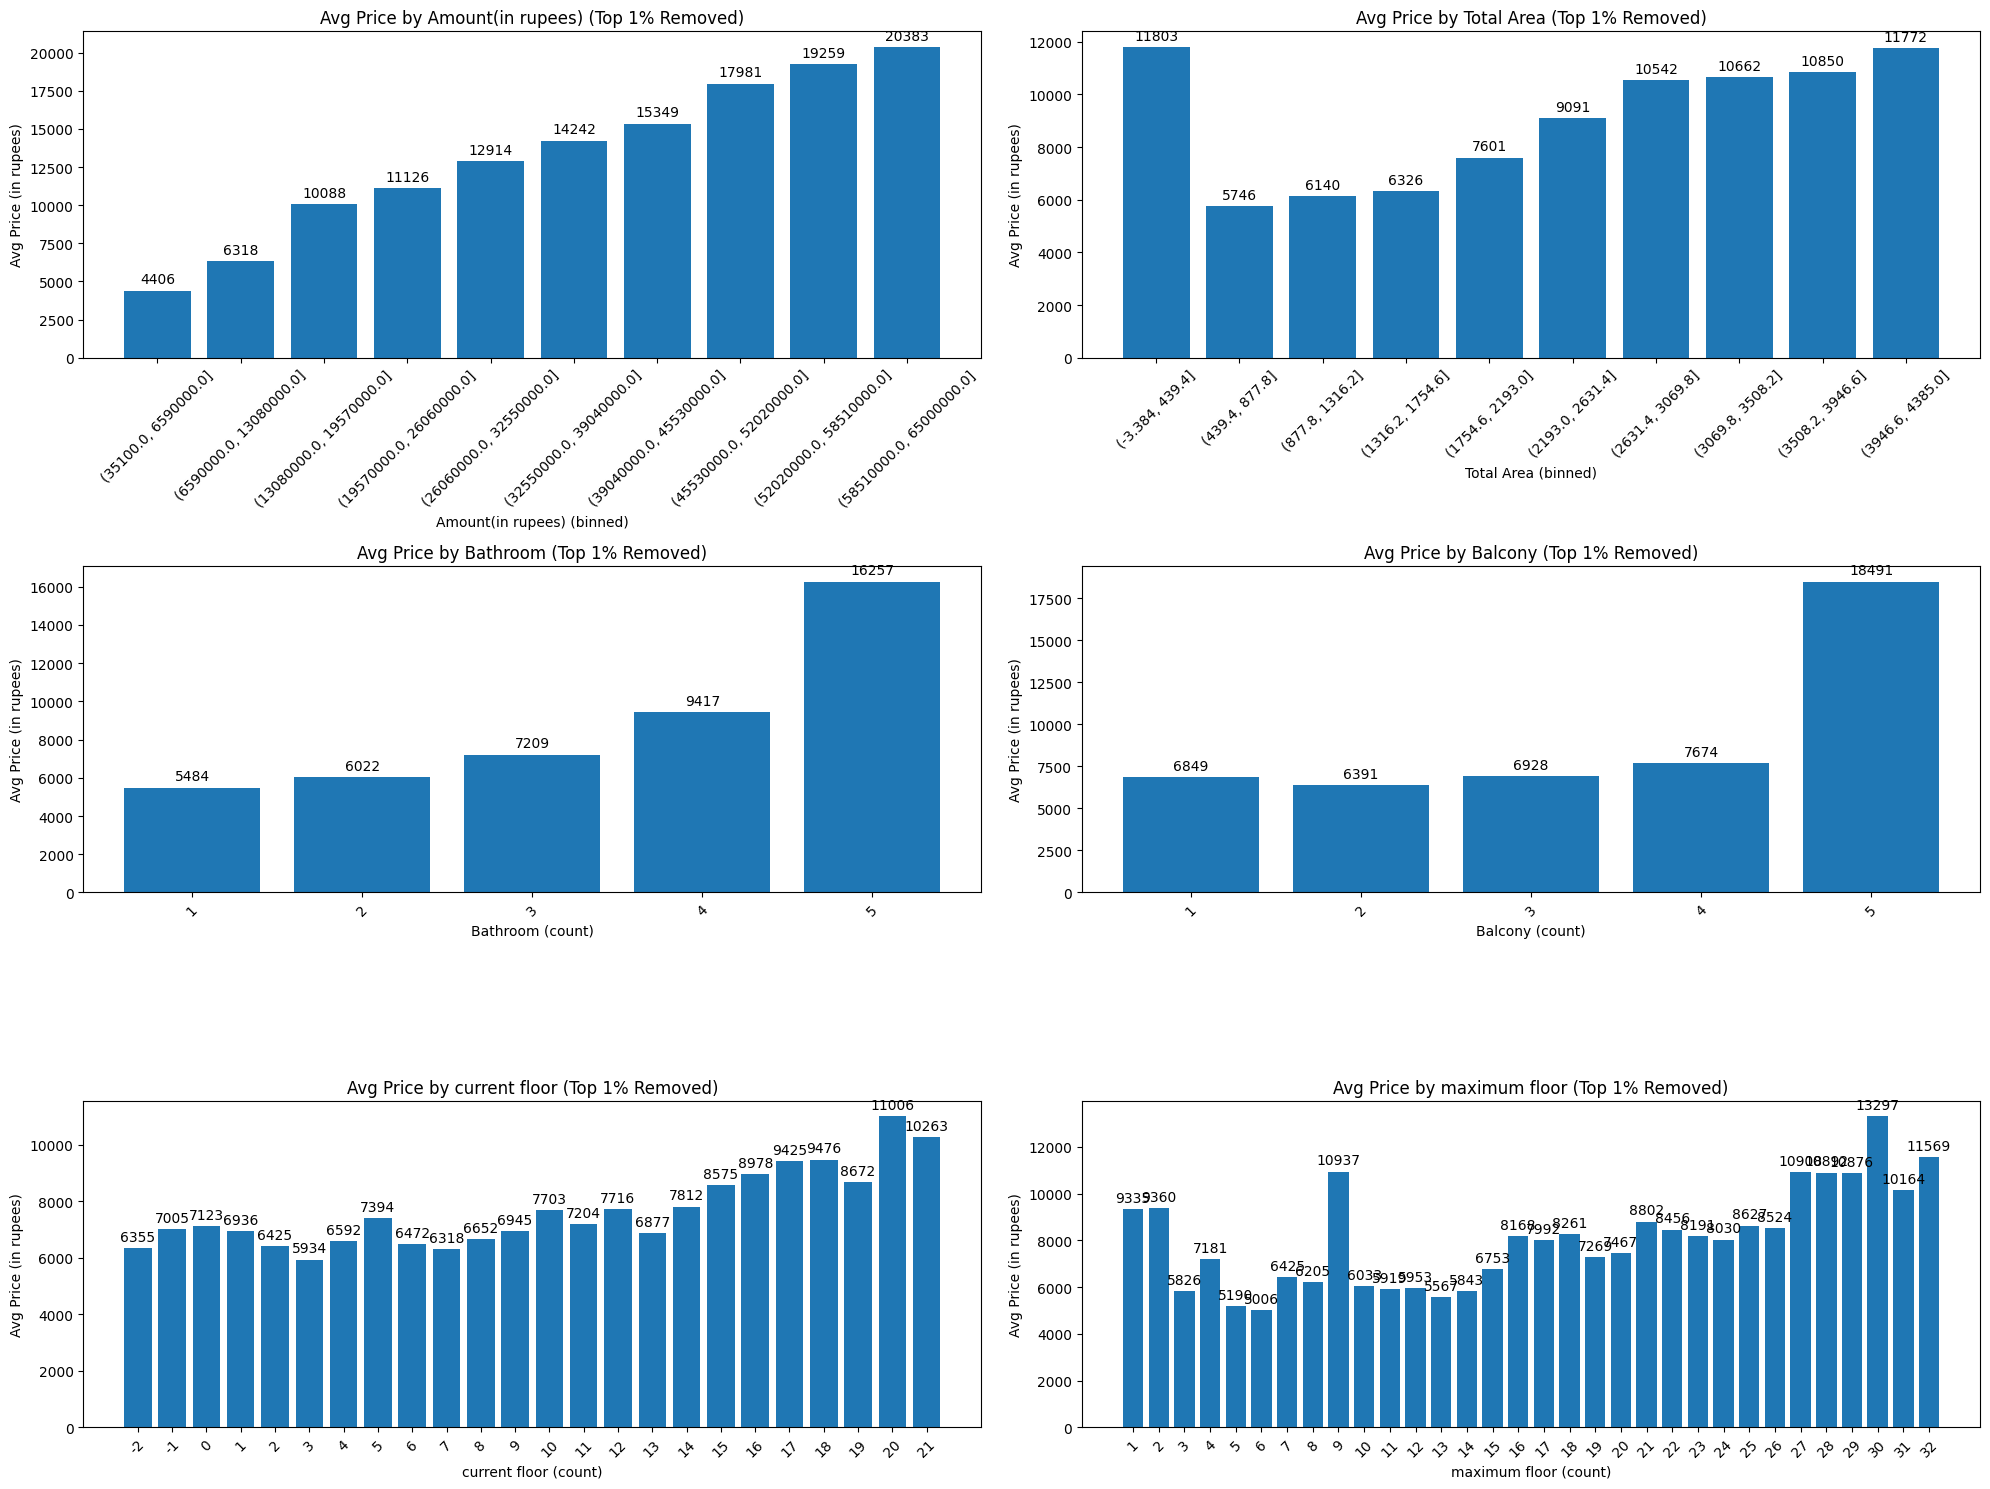

In [70]:
# @title GRAPHS Average Amount with FEATURES without Top 1%

# target_column = 'Price (in rupees)'
# features = ['Amount(in rupees)', 'Total Area', 'Bathroom', 'Balcony', 'current floor','maximum floor']

# # Features to group by as integers directly
# integer_bucket_features = ['Bathroom', 'Balcony', 'current floor','maximum floor']

# for column in features:
#     plt.figure(figsize=(12, 6))

#     # Drop missing values and remove top 1% outliers
#     filtered = df[[column, target_column]].dropna()
#     threshold = filtered[column].quantile(0.99)
#     filtered = filtered[filtered[column] <= threshold]

#     if column in integer_bucket_features:
#         # Round or convert to int, then group
#         filtered[column] = filtered[column].astype(int)
#         mean_price = filtered.groupby(column)[target_column].mean().sort_index()
#         x_label = f"{column} (count)"
#     else:
#         # Bin into 10 equal-width bins for continuous features
#         binned = pd.cut(filtered[column], bins=10)
#        # mean_price = filtered.groupby(binned)[target_column].mean().sort_index() warning
#         mean_price = filtered.groupby(binned, observed=True)[target_column].mean().sort_index() #without warnings
#         x_label = f"{column} (binned)"

#     # Plot and add labels
#     ax = mean_price.plot(kind='bar')
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%.0f', padding=3)

#     plt.title(f"Average Price by {column} (Top 1% Removed)")
#     plt.xlabel(x_label)
#     plt.ylabel("Average Price (in rupees)")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


import matplotlib.pyplot as plt
import pandas as pd

target_column = 'Price (in rupees)'
features = ['Amount(in rupees)', 'Total Area', 'Bathroom', 'Balcony', 'current floor', 'maximum floor']

# Features to group by as integers directly
integer_bucket_features = ['Bathroom', 'Balcony', 'current floor', 'maximum floor']

# Subplot grid setup
ncols = 2
nrows = (len(features) + ncols - 1) // ncols
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axs = axs.flatten()

for idx, column in enumerate(features):
    ax = axs[idx]

    # Drop missing values and remove top 1% outliers
    filtered = df[[column, target_column]].dropna()
    threshold = filtered[column].quantile(0.99)
    filtered = filtered[filtered[column] <= threshold]

    if column in integer_bucket_features:
        # Round or convert to int, then group
        filtered[column] = filtered[column].astype(int)
        mean_price = filtered.groupby(column)[target_column].mean().sort_index()
        x_label = f"{column} (count)"
    else:
        # Bin into 10 equal-width bins for continuous features
        binned = pd.cut(filtered[column], bins=10)
        mean_price = filtered.groupby(binned, observed=True)[target_column].mean().sort_index()
        x_label = f"{column} (binned)"

    # Plot the mean price
    ax.bar(mean_price.index.astype(str), mean_price.values)
    ax.set_title(f"Avg Price by {column} (Top 1% Removed)")
    ax.set_xlabel(x_label)
    ax.set_ylabel("Avg Price (in rupees)")
    ax.tick_params(axis='x', rotation=45)

    # Add labels to bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

# Remove any unused subplots
for idx in range(len(features), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


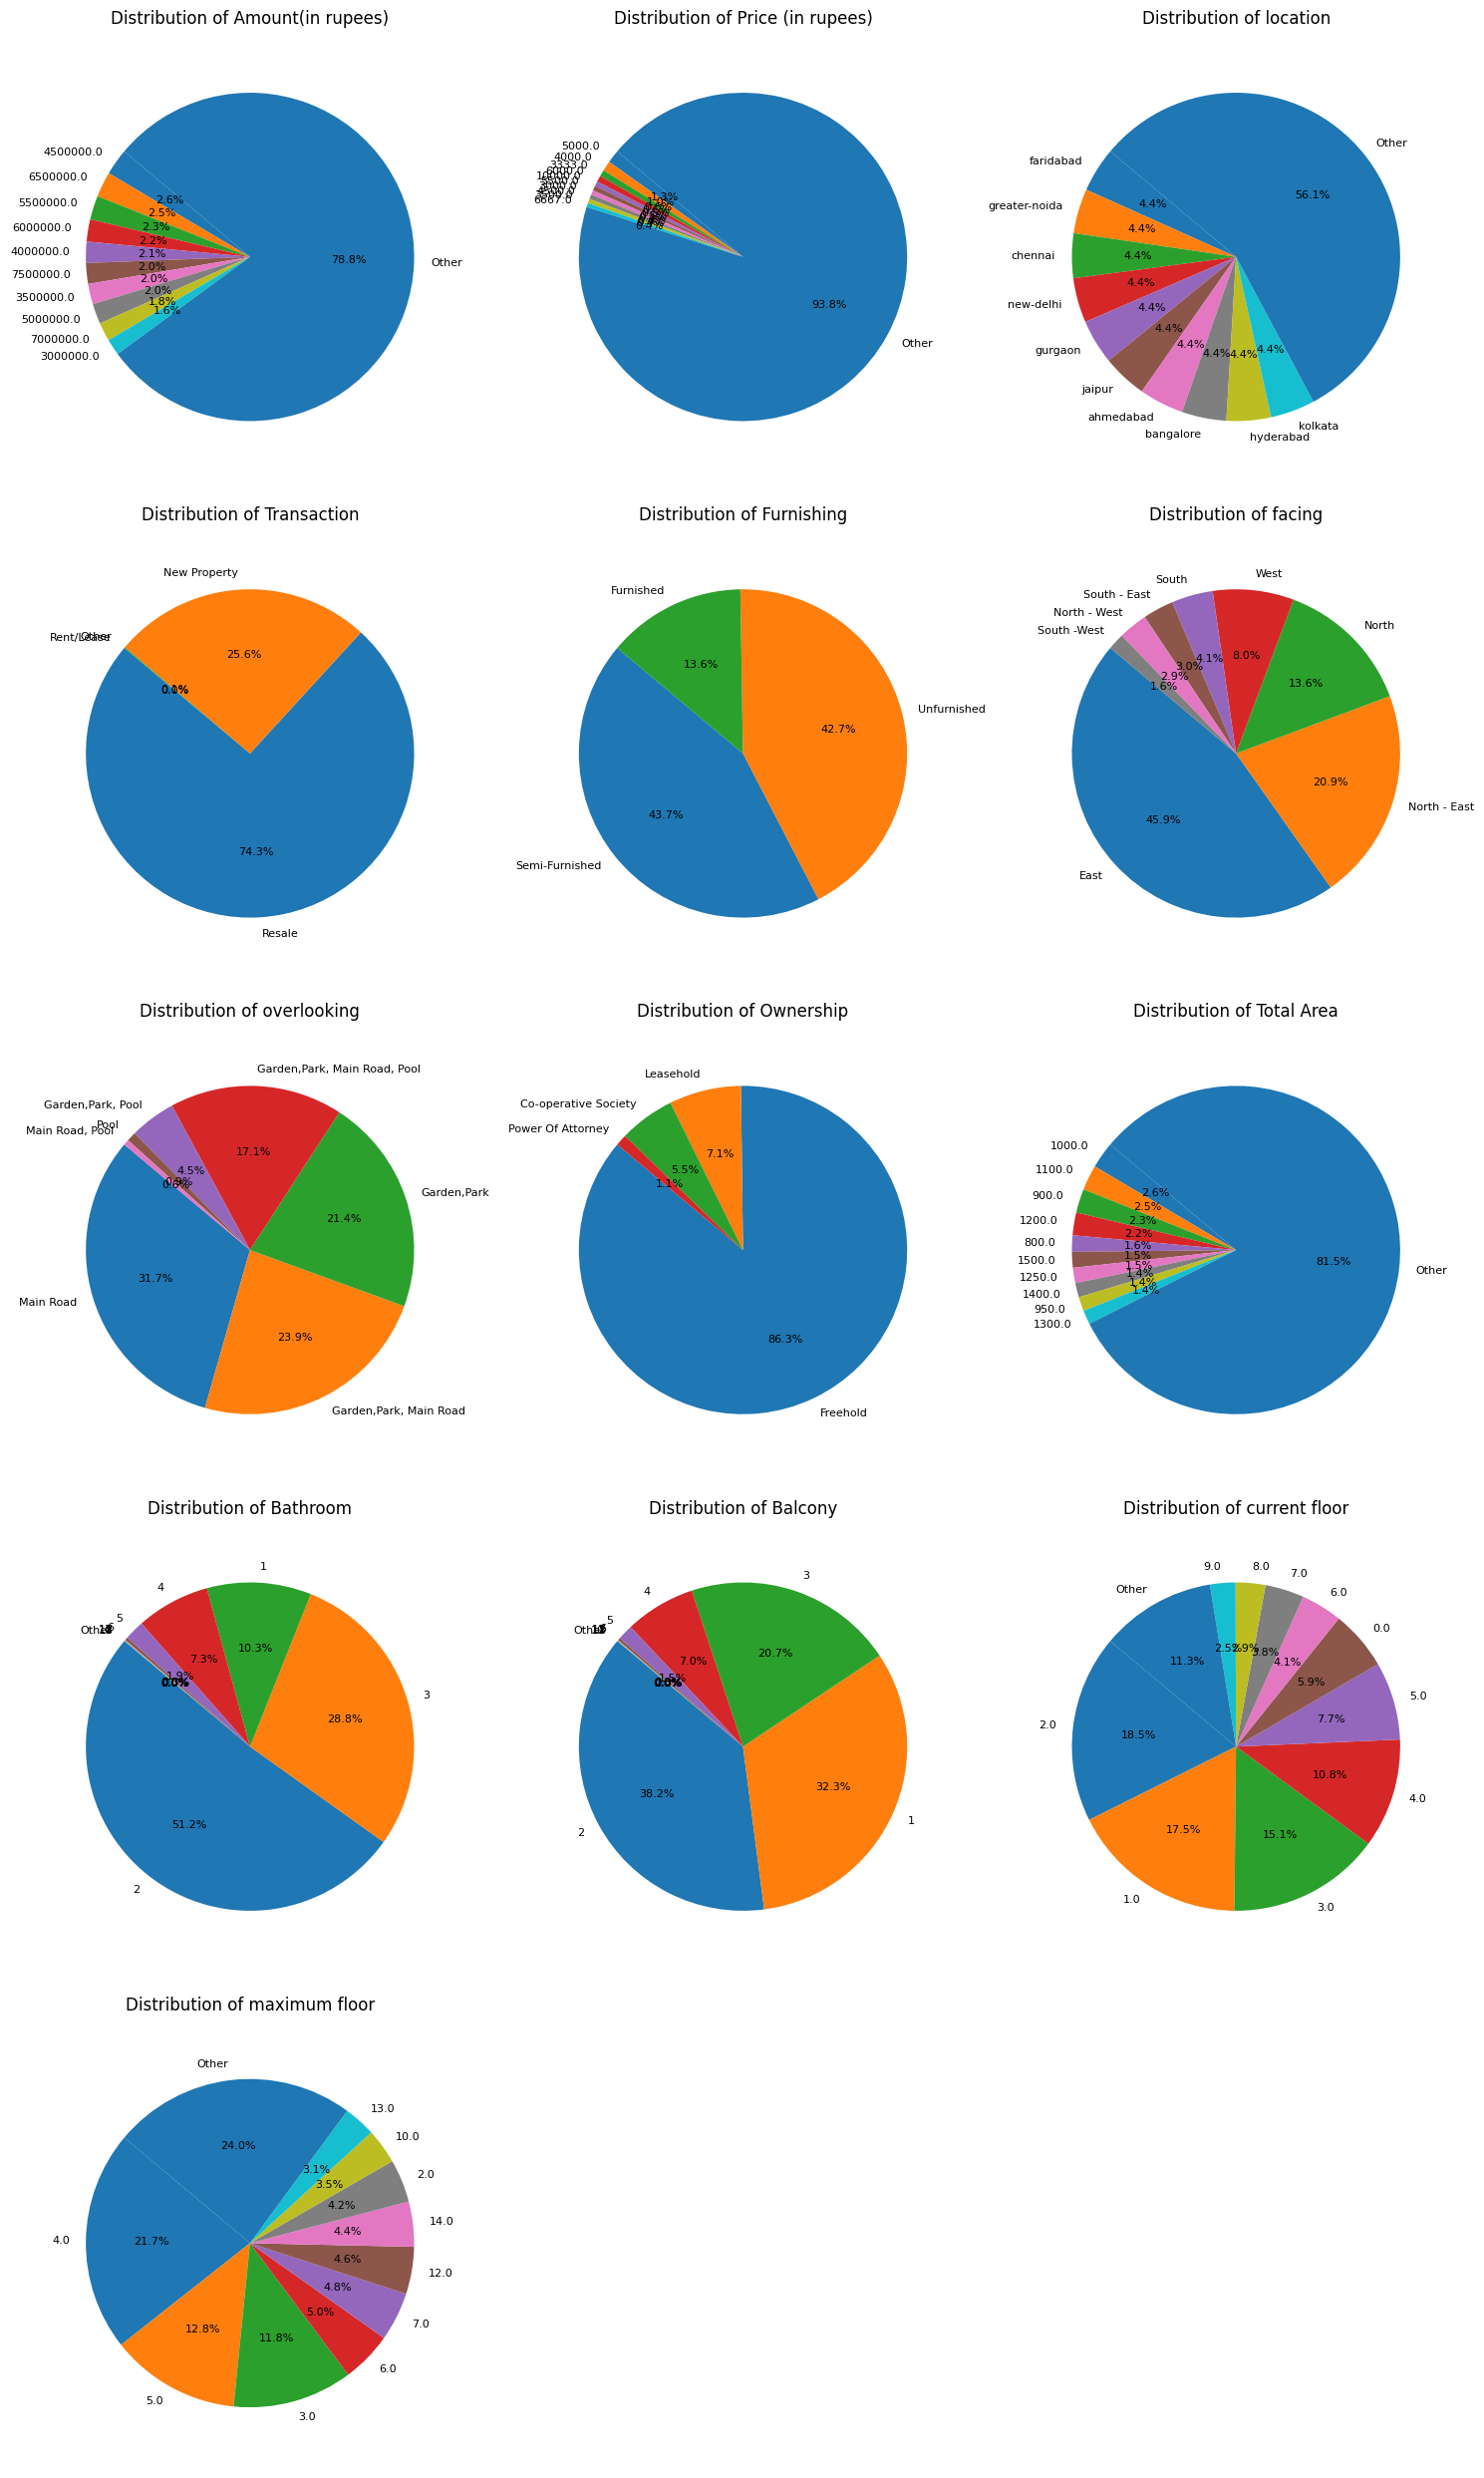

In [71]:
# @title Circle graph

# # Columns to analyze
# columns = ['Amount(in rupees)', 'Price (in rupees)', 'location', 'Transaction', 'Furnishing',
#            'facing', 'overlooking', 'Ownership', 'Total Area', 'Bathroom', 'Balcony', 'current floor','maximum floor']

# for column in columns:
#     print("Summary statistics for column:", column)
#     print(df[column].describe())

#     plt.figure(figsize=(8, 8))

#     # Drop missing and get value counts
#     value_counts = df[column].dropna().value_counts()

#     # Top 10 values + other
#     top_values = value_counts.head(10)
#     other_count = value_counts.iloc[10:].sum()
#     if other_count > 0:
#         top_values["Other"] = other_count

#     # No transformation of index values

#     # Plot pie chart
#     plt.pie(top_values, labels=top_values.index, autopct='%1.1f%%', startangle=140)
#     plt.title(f"Distribution of {column}")
#     plt.axis('equal')
#     plt.tight_layout()
#     plt.show()


import matplotlib.pyplot as plt
import pandas as pd

# Columns to analyze
columns = ['Amount(in rupees)', 'Price (in rupees)', 'location', 'Transaction', 'Furnishing',
           'facing', 'overlooking', 'Ownership', 'Total Area', 'Bathroom', 'Balcony', 'current floor','maximum floor']

# Subplot grid setup
ncols = 3
nrows = (len(columns) + ncols - 1) // ncols
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axs = axs.flatten()

for idx, column in enumerate(columns):
    ax = axs[idx]

    # Summary statistics
    # print(f"Summary statistics for column: {column}")
    # print(df[column].describe())

    # Drop missing and get value counts
    value_counts = df[column].dropna().value_counts()

    # Top 10 values + other
    top_values = value_counts.head(10)
    other_count = value_counts.iloc[10:].sum()
    if other_count > 0:
        top_values["Other"] = other_count

    # Plot pie chart with smaller labels
    ax.pie(top_values, labels=top_values.index, autopct='%1.1f%%', startangle=140, labeldistance=1.1,
           textprops={'fontsize': 8})  # Adjust fontsize here
    ax.set_title(f"Distribution of {column}")
    ax.axis('equal')

# Remove any unused subplots
for idx in range(len(columns), len(axs)):
    fig.delaxes(axs[idx])

plt.tight_layout()
plt.show()


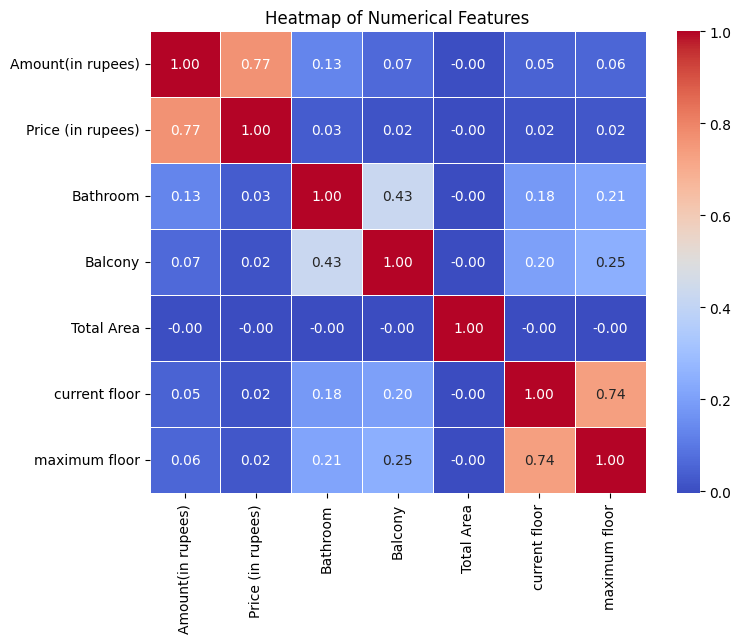

In [30]:
# @title HeatMap

# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Features")
plt.show()


# SPLIT

In [31]:
# @title SPLIT

from sklearn.model_selection import train_test_split
# Φόρτωσε τα καθαρισμένα δεδομένα
df = pd.read_csv('scaled_house_prices.csv')

# Χωρίζεις features από το target
X = df.drop('Amount(in rupees)', axis=1)  # X= ALL FEATURES EXCEPT TARGET
y = df['Amount(in rupees)']               # Y= TARGET

# Κάνεις το split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Version 1

In [51]:
# @title VERSION 1 Mean,Most Frequent
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder

X_train_V_1 = X_train.copy()
X_test_V_1 = X_test.copy()

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64','Int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Apply simple imputer with mean strategy on numerical features
si1 = SimpleImputer(strategy='mean')
# fit (train) imputer on the training dataset
si1.fit(X_train_V_1[num_features])
# apply imputation on both training and test datasets
X_train_V_1[num_features] = si1.transform(X_train_V_1[num_features])
X_test_V_1[num_features] = si1.transform(X_test_V_1[num_features])

# ALTERNATIVELY: you could fit and transform training data at the same time and then transform test data separately
#X_train_V_1[num_features] = si1.fit_transform(X_train_V_1[num_features])
#X_test_V_1[num_features] = si1.transform(X_test_V_1[num_features])

# Apply robust scaling on Age and Fare ASK
#rs = RobustScaler()
#features_to_scale = ['Age', 'Fare']
#rs.fit(X_train_V_1[features_to_scale])
#X_train_V_1[features_to_scale] = rs.transform(X_train_V_1[features_to_scale])
#X_test_V_1[features_to_scale] = rs.transform(X_test_V_1[features_to_scale])

# Apply simple imputer with most_frequent strategy on categorical features
si2 = SimpleImputer(strategy='most_frequent')
si2.fit(X_train_V_1[cat_features])
X_train_V_1[cat_features] = si2.transform(X_train_V_1[cat_features])
X_test_V_1[cat_features] = si2.transform(X_test_V_1[cat_features])

# Apply ordinal encoding on categorical features
#ordinal_encoder = OrdinalEncoder(return_df=True,
      #                           handle_unknown='value',   # Handle unknown categories in the test set (at transform time) --> Encode unseen categories with -1
        #                        )

ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)
X_train_V_1[cat_features] = ordinal_encoder.fit_transform(X_train_V_1[cat_features])
X_test_V_1[cat_features] = ordinal_encoder.transform(X_test_V_1[cat_features])

X_train_V_1_skewed = X_train_V_1.copy()
#print(X_train_V_1)
#print(X_test_V_1)

In [52]:
# @title VERSION 1 Mean,Most frequency Unskewing
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Replace this with your actual DataFrame
# df_scaled = pd.read_csv("your_cleaned_file.csv")

# Columns you want to transform
columns_to_transform = [
    'Price (in rupees)', 'Total Area',
    'Bathroom', 'Balcony', 'maximum floor', 'current floor'
]

# Create a copy to hold transformed values
df_transformed = X_train_V_1.copy()

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

for col in columns_to_transform:
    try:
        # Reshape and transform
        transformed = pt.fit_transform(X_train_V_1[[col]])
        # df_transformed[f'{col} (YeoJ)'] = transformed
        df_transformed[f'{col}'] = transformed
    except Exception as e:
        print(f"Error transforming {col}: {e}")

# Print skewness after transformation
for col in columns_to_transform:
    # transformed_col = f'{col} (YeoJ)'
    transformed_col = col
    if transformed_col in df_transformed:
        skew_val = df_transformed[transformed_col].skew()
        print(f'{transformed_col} skewness: {skew_val:.4f}')
X_train_V_1_unskewed=df_transformed.copy()

Price (in rupees) skewness: 0.0999
Total Area skewness: -0.2093
Bathroom skewness: -0.0042
Balcony skewness: 0.0005
maximum floor skewness: 0.0506
current floor skewness: -0.0587


In [53]:
len(X_train_V_1_skewed.columns)

15

In [54]:
!pip install xgboost
!pip install mlxtend
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 1 Feature Selection Skewed
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_1_skewed = X_train_V_1_skewed.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_1_skewed, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   38.1s finished

[2025-04-16 10:08:07] Features: 1/15 -- score: 0.3680190537373556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: must be real number, not NoneType

In [ ]:
!pip install xgboost
!pip install mlxtend

from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 1 Feature Selection Unskewed
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_1_unskewed = X_train_V_1_unskewed.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_1_unskewed, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

# Version 2


In [55]:
# @title VERSION 2 Predict numericals with IterativeImputer,Most frequent
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X_train_V_2 = X_train.copy()
X_test_V_2 = X_test.copy()

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64','Int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Predictive imputer για numeric
ii1 = IterativeImputer(random_state=42)
# Fit μόνο στα numeric features του training set
ii1.fit(X_train_V_2[num_features])
# Apply στους πίνακες
X_train_V_2[num_features] = ii1.transform(X_train_V_2[num_features])
X_test_V_2[num_features] = ii1.transform(X_test_V_2[num_features])

# ALTERNATIVELY: you could fit and transform training data at the same time and then transform test data separately
#X_train_V_2[num_features] = si1.fit_transform(X_train_V_2[num_features])
#X_test_V_2[num_features] = si1.transform(X_test_V_2[num_features])

# Apply robust scaling on Age and Fare ASK
#rs = RobustScaler()
#features_to_scale = ['Age', 'Fare']
#rs.fit(X_train_V_1[features_to_scale])
#X_train_V_2[features_to_scale] = rs.transform(X_train_V_2[features_to_scale])
#X_test_V_2[features_to_scale] = rs.transform(X_test_V_2[features_to_scale])

# Apply simple imputer with most_frequent strategy on categorical features
ii2 = SimpleImputer(strategy='most_frequent')
ii2.fit(X_train_V_2[cat_features])
X_train_V_2[cat_features] = ii2.transform(X_train_V_2[cat_features])
X_test_V_2[cat_features] = ii2.transform(X_test_V_2[cat_features])

# Apply ordinal encoding on categorical features
#ordinal_encoder = OrdinalEncoder(return_df=True,handle_unknown='value',   # Handle unknown categories in the test set (at transform time) --> Encode unseen categories with -1)

ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)
X_train_V_2[cat_features] = ordinal_encoder.fit_transform(X_train_V_2[cat_features])
X_test_V_2[cat_features] = ordinal_encoder.transform(X_test_V_2[cat_features])

X_train_V_2_skewed = X_train_V_2.copy()
#print(X_train_V_2)
#print(X_test_V_2)

In [56]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
# @title VERSION 2 Predict numericals with IterativeImputer,Most frequent Unskewed
# Replace this with your actual DataFrame
# df_scaled = pd.read_csv("your_cleaned_file.csv")

# Columns you want to transform
columns_to_transform = [
    'Price (in rupees)', 'Total Area',
    'Bathroom', 'Balcony', 'maximum floor', 'current floor'
]

# Create a copy to hold transformed values
df_transformed = X_train_V_2.copy()

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

for col in columns_to_transform:
    try:
        # Reshape and transform
        transformed = pt.fit_transform(X_train_V_2[[col]])
        # df_transformed[f'{col} (YeoJ)'] = transformed
        df_transformed[f'{col}'] = transformed
    except Exception as e:
        print(f"Error transforming {col}: {e}")

# Print skewness after transformation
for col in columns_to_transform:
    transformed_col = col
    if transformed_col in df_transformed:
        skew_val = df_transformed[transformed_col].skew()
        print(f'{transformed_col} skewness: {skew_val:.4f}')
X_train_V_2_unskewed=df_transformed.copy()

Price (in rupees) skewness: 0.0999
Total Area skewness: -0.2093
Bathroom skewness: -0.0042
Balcony skewness: -0.7368
maximum floor skewness: -2.4917
current floor skewness: -3.6339


In [ ]:
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 2 Feature Selection  Skewed
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_2_skewed = X_train_V_2_skewed.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_2_skewed, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

In [ ]:
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 2 Feature Selection  Unskewed
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_2_unskewed = X_train_V_2_unskewed.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_2_unskewed, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

# Version 3

In [59]:
# @title VERSION 3 Median,Most Frequent
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder

X_train_V_3 = X_train.copy()
X_test_V_3 = X_test.copy()

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64','Int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Apply simple imputer with mean strategy on numerical features
si6 = SimpleImputer(strategy='median')
# fit (train) imputer on the training dataset
si6.fit(X_train_V_3[num_features])
# apply imputation on both training and test datasets
X_train_V_3[num_features] = si6.transform(X_train_V_3[num_features])
X_test_V_3[num_features] = si6.transform(X_test_V_3[num_features])

# ALTERNATIVELY: you could fit and transform training data at the same time and then transform test data separately
#X_train_V_3[num_features] = si6.fit_transform(X_train_V_3[num_features])
#X_test_V_3[num_features] = si6.transform(X_test_V_3[num_features])

# Apply robust scaling on Age and Fare ASK
#rs = RobustScaler()
#features_to_scale = ['Age', 'Fare']
#rs.fit(X_train_V_3[features_to_scale])
#X_train_V_3[features_to_scale] = rs.transform(X_train_V_3[features_to_scale])
#X_test_V_3[features_to_scale] = rs.transform(X_test_V_3[features_to_scale])

# Apply simple imputer with most_frequent strategy on categorical features
si7 = SimpleImputer(strategy='most_frequent')
si7.fit(X_train_V_3[cat_features])
X_train_V_3[cat_features] = si7.transform(X_train_V_3[cat_features])
X_test_V_3[cat_features] = si7.transform(X_test_V_3[cat_features])

# Apply ordinal encoding on categorical features
#ordinal_encoder = OrdinalEncoder(return_df=True,
      #                           handle_unknown='value',   # Handle unknown categories in the test set (at transform time) --> Encode unseen categories with -1
        #                        )

ordinal_encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X_train_V_3[cat_features] = ordinal_encoder.fit_transform(X_train_V_3[cat_features])

# Transform test (no fitting!)
X_test_V_3[cat_features] = ordinal_encoder.transform(X_test_V_3[cat_features])
X_train_V_3_skewed = X_train_V_3.copy()

#print(X_train_V_1)
#print(X_test_V_1)

In [60]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Replace this with your actual DataFrame
# df_scaled = pd.read_csv("your_cleaned_file.csv")

# Columns you want to transform
columns_to_transform = [
    'Price (in rupees)', 'Total Area',
    'Bathroom', 'Balcony', 'maximum floor', 'current floor'
]

# Create a copy to hold transformed values
df_transformed = X_train_V_3.copy()

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

for col in columns_to_transform:
    try:
        # Reshape and transform
        transformed = pt.fit_transform(X_train_V_3[[col]])
        df_transformed[f'{col}'] = transformed
    except Exception as e:
        print(f"Error transforming {col}: {e}")

# Print skewness after transformation
for col in columns_to_transform:
    transformed_col = col
    if transformed_col in df_transformed:
        skew_val = df_transformed[transformed_col].skew()
        print(f'{transformed_col} skewness: {skew_val:.4f}')
X_train_V_3_unskewed=df_transformed.copy()

Price (in rupees) skewness: 0.0767
Total Area skewness: -0.1734
Bathroom skewness: -0.0046
Balcony skewness: 0.0025
maximum floor skewness: 0.0586
current floor skewness: -0.0697


In [ ]:
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 3 Feature Selection Skewed
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_3_skewed = X_train_V_3_skewed.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_3_skewed, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

In [ ]:
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 3 Feature Selection Skewed
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,15),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_3_unskewed = X_train_V_3_unskewed.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_3_unskewed, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

# Version 4

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
import pandas as pd

# Copy original datasets
X_train_V_4 = X_train.copy()
X_test_V_4 = X_test.copy()


# Identify features
num_features = X.select_dtypes(include=['int64','Int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Remove 'overlooking' from regular categorical features
cat_features.remove('overlooking')

# === 1. Impute numerical features ===
si8 = SimpleImputer(strategy='median')
si8.fit(X_train_V_4[num_features])
X_train_V_4[num_features] = si8.transform(X_train_V_4[num_features])
X_test_V_4[num_features] = si8.transform(X_test_V_4[num_features])

# === 2. Impute and encode regular categorical features ===
si9 = SimpleImputer(strategy='most_frequent')
si9.fit(X_train_V_4[cat_features])
X_train_V_4[cat_features] = si9.transform(X_train_V_4[cat_features])
X_test_V_4[cat_features] = si9.transform(X_test_V_4[cat_features])

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_V_4[cat_features] = ordinal_encoder.fit_transform(X_train_V_4[cat_features])
X_test_V_4[cat_features] = ordinal_encoder.transform(X_test_V_4[cat_features])

# === 3. Handle "overlooking" column using OneHotEncoder ===

# First, handle the 'overlooking' column by creating a separate dataframe
# Fill NAs and split the comma-separated values
X_train_V_4['overlooking'] = X_train_V_4['overlooking'].fillna('')
X_test_V_4['overlooking'] = X_test_V_4['overlooking'].fillna('')

# Create expanded dataframes for the comma-separated values
# First, get all unique values from the overlooking column
all_overlooking_values = set()
for values in X_train_V_4['overlooking'].str.split(','):
    all_overlooking_values.update([v.strip() for v in values if v.strip()])

# Create binary columns for each value
for value in all_overlooking_values:
    col_name = f"overlooking_{value}"
    X_train_V_4[col_name] = X_train_V_4['overlooking'].apply(
        lambda x: 1 if value in [item.strip() for item in x.split(',') if item.strip()] else 0
    )
    X_test_V_4[col_name] = X_test_V_4['overlooking'].apply(
        lambda x: 1 if value in [item.strip() for item in x.split(',') if item.strip()] else 0
    )

# Drop original "overlooking" column
X_train_V_4.drop(columns='overlooking', inplace=True)
X_test_V_4.drop(columns='overlooking', inplace=True)

X_train_V_4_skewed = X_train_V_4.copy()

In [63]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Replace this with your actual DataFrame
# df_scaled = pd.read_csv("your_cleaned_file.csv")

# Columns you want to transform
columns_to_transform = [
    'Price (in rupees)', 'Total Area',
    'Bathroom', 'Balcony', 'maximum floor', 'current floor'
]

# Create a copy to hold transformed values
df_transformed = X_train_V_4.copy()

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')

for col in columns_to_transform:
    try:
        # Reshape and transform
        transformed = pt.fit_transform(X_train_V_4[[col]])
        # df_transformed[f'{col} (YeoJ)'] = transformed
        df_transformed[f'{col}'] = transformed
    except Exception as e:
        print(f"Error transforming {col}: {e}")

# Print skewness after transformation
for col in columns_to_transform:
    # transformed_col = f'{col} (YeoJ)'
    transformed_col = col
    if transformed_col in df_transformed:
        skew_val = df_transformed[transformed_col].skew()
        print(f'{transformed_col} skewness: {skew_val:.4f}')
X_train_V_4_unskewed=df_transformed.copy()


Price (in rupees) skewness: 0.0767
Total Area skewness: -0.1734
Bathroom skewness: -0.0046
Balcony skewness: 0.0025
maximum floor skewness: 0.0586
current floor skewness: -0.0697


In [ ]:
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 4 Feature Selection  Skewed
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,18),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_4_skewed = X_train_V_4_skewed.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_4_skewed, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

In [ ]:
!pip install xgboost
!pip install mlxtend

from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#@title Version 4 Feature Selection Unskewed
xgb = XGBRegressor()

#Sequential Forward Selection
sfs = SFS(xgb,
           k_features=(5,18),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=10,
           n_jobs=-1)

# Clean labels
y_train = y_train.replace([np.inf, -np.inf], np.nan).dropna()
valid_indices = y_train.index
X_train_V_4_unskewed = X_train_V_4_unskewed.loc[valid_indices]
y_train = y_train.loc[valid_indices]

# Now fit
sfs = sfs.fit(X_train_V_4_unskewed, y_train)

print('best combination (R²: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
print('all subsets:\n', sfs.subsets_)
plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.show()

# Best Performance Feature (Drop unnecessary columns)

In [ ]:
sfs = SFS(XGBRegressor(), k_features='best', forward=True, scoring='r2', cv=5)
sfs = sfs.fit(X_train_V_1_skewed.values, y_train)

In [ ]:
X_train_best = X_train_V_1_skewed.iloc[:, list(sfs.k_feature_idx_)]

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
y_train_yj = pt.fit_transform(y_train.values.reshape(-1, 1)).ravel()


# Methodology

In [ ]:
!pip install catboost
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

featuresets = {
    'v1': X_train_V_1_skewed,
    'v2': X_train_V_1_unskewed,
    'v3': X_train_V_2_skewed,
    'v4': X_train_V_2_unskewed,
    'v5': X_train_V_3_skewed,
    'v6': X_train_V_3_unskewed
    'v7': X_train_V_3_skewed,
    'v8': X_train_V_3_unskewed

}

targets = {
    'original': y_train,
    'unskewed': y_train_yj
}

# Define regressors
regressors = {
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(silent=True),
    "SVR": SVR(),
    "KNeighbors": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
}

# Dictionary to store results
results = []

# Loop over each featureset version
for feature_name, X_data in featuresets.items():
    # loop over each target version
    for target_name, y_data in targets.items():
        # Loop over each regressor
        print(feature_name+" "+target_name+":", end=' ... ')
        for rgs_name, rgs in regressors.items():
            print(rgs_name, end=' ... ')
            # Perform 10-fold cross-validation
            scores = cross_val_score(rgs, X_data, y_data, cv=10, scoring='r2', n_jobs=-1)
            # Store the average score for this classifier and dataset version
            avg_score = scores.mean()
            results.append({
                'featureset': feature_name,
                'target': target_name,
                'regressor': rgs_name,
                'score': avg_score
            })
        print()

v1 original: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... DecisionTree ... 
v1 unskewed: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... DecisionTree ... 
v2 original: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... DecisionTree ... 
v2 unskewed: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... DecisionTree ... 
v3 original: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... DecisionTree ... 
v3 unskewed: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... DecisionTree ... 
v4 original: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... DecisionTree ... 
v4 unskewed: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... DecisionTree ... 
v5 original: ... RandomForest ... AdaBoost ... XGBoost ... CatBoost ... SVR ... KNeighbors ... D

In [ ]:
# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df

,featureset,target,regressor,score
0,v1,original,RandomForest,-0.859120
1,v1,original,AdaBoost,-2.024513
2,v1,original,XGBoost,-0.533028
3,v1,original,CatBoost,0.727078
4,v1,original,SVR,-0.054628
...,...,...,...,...
79,v6,unskewed,XGBoost,0.946983
80,v6,unskewed,CatBoost,0.950760
81,v6,unskewed,SVR,0.175307
82,v6,unskewed,KNeighbors,0.868365


In [ ]:
# Best performing regressors: RandomForest, AdaBoost and CatBoost (almost same performance) mostly on the unskewed target variable
results_df.groupby(['regressor', 'target'])['score'].agg(['mean']).sort_values(by='mean', ascending=False)

,,mean
regressor,target,
CatBoost,unskewed,0.951923
XGBoost,unskewed,0.948328
RandomForest,unskewed,0.947067
DecisionTree,unskewed,0.897958
KNeighbors,unskewed,0.865501
AdaBoost,unskewed,0.795034
CatBoost,original,0.660647
SVR,unskewed,0.174019
KNeighbors,original,0.055853


In [ ]:
# Best performing featuresets: v2, v4 also in conjuction with the unskewed target variable
results_df.groupby(['featureset', 'target'])['score'].agg(['mean']).sort_values(by='mean', ascending=False)

mean
featureset target            
v6         unskewed  0.798801
v5         unskewed  0.798187
v2         unskewed  0.796916
v3         unskewed  0.796435
v4         unskewed  0.796196
v1         unskewed  0.796177
           original -0.514831
v5         original -0.549039
v4         original -0.791142
v6         original -1.067622
v2         original -1.079883
v3         original -1.219843

In [ ]:
for key in X_train_all:
    X_train_all[key] = X_train_all[key].iloc[:len(y_train)]
print("y_train length:", len(y_train))

NameError: name 'X_train_all' is not defined

In [ ]:
# ------------------[ Imports ]------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

# ------------------[ Preprocessing Pipelines ]------------------
num_pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

num_pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('unskewer', PowerTransformer(method='yeo-johnson'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# ------------------[ ColumnTransformers ]------------------
# Version 5: no unskewing
preprocessor_v5 = ColumnTransformer(
    transformers=[
        ('num', num_pipeline1, X_train.iloc[:, list(sfs.k_feature_idx_)].select_dtypes(include=['int64', 'float64']).columns),
        ('cat', cat_pipeline, X_train.iloc[:, list(sfs.k_feature_idx_)].select_dtypes(include=['object']).columns)
    ],
    remainder='passthrough'
)

# Version 6: with unskewing
preprocessor_v6 = ColumnTransformer(
    transformers=[
        ('num', num_pipeline2, X_train.iloc[:, list(sfs.k_feature_idx_)].select_dtypes(include=['int64', 'float64']).columns),
        ('cat', cat_pipeline, X_train.iloc[:, list(sfs.k_feature_idx_)].select_dtypes(include=['object']).columns)
    ],
    remainder='passthrough'
)

# ------------------[ Regressors ]------------------
rgs_rf = TransformedTargetRegressor(
    regressor=RandomForestRegressor(),
    transformer=PowerTransformer(method='yeo-johnson')
)

rgs_xgb = TransformedTargetRegressor(
    regressor=XGBRegressor(),
    transformer=PowerTransformer(method='yeo-johnson')
)

# ------------------[ Pipelines ]------------------
pipelines = {
    'rf_v5': Pipeline([('preprocessor', preprocessor_v5), ('estimator', rgs_rf)]),
    'xgb_v5': Pipeline([('preprocessor', preprocessor_v5), ('estimator', rgs_xgb)]),
    'rf_v6': Pipeline([('preprocessor', preprocessor_v6), ('estimator', rgs_rf)]),
    'xgb_v6': Pipeline([('preprocessor', preprocessor_v6), ('estimator', rgs_xgb)]),
}

# ------------------[ Parameter Grids ]------------------
param_grid_rf = [{
    'estimator__regressor__n_estimators': [100, 200],
    'estimator__regressor__max_depth': [None, 10],
    'estimator__regressor__min_samples_split': [2, 5],
    'estimator__regressor__min_samples_leaf': [1, 2],
    'estimator__regressor__max_features': ['sqrt'],
    'estimator__regressor__bootstrap': [True]
}]

param_grid_xgb = [{
    'estimator__regressor__n_estimators': [100, 200],
    'estimator__regressor__max_depth': [3, 6],
    'estimator__regressor__learning_rate': [0.1, 0.3],
    'estimator__regressor__subsample': [0.8, 1.0]
}]

param_grids = {
    'rf_v5': param_grid_rf,
    'xgb_v5': param_grid_xgb,
    'rf_v6': param_grid_rf,
    'xgb_v6': param_grid_xgb,
}

# ------------------[ Data Prep ]------------------
X_train_selected = X_train.iloc[:, list(sfs.k_feature_idx_)]
X_test_selected = X_test.iloc[:, list(sfs.k_feature_idx_)]
valid_indices = y_test.dropna().index
y_test = y_test.loc[valid_indices]
X_test_selected = X_test_selected.loc[valid_indices]

X_train_all = {
    'rf_v5': X_train_selected,
    'xgb_v5': X_train_selected,
    'rf_v6': X_train_selected,
    'xgb_v6': X_train_selected,
}
X_test_all = {
    'rf_v5': X_test_selected,
    'xgb_v5': X_test_selected,
    'rf_v6': X_test_selected,
    'xgb_v6': X_test_selected,
}

# ------------------[ Grid Search Loop ]------------------
best_estimators = {}

for pipeline_name, pipeline in pipelines.items():
    print(f"Running GridSearchCV for {pipeline_name}...")
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[pipeline_name],
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    grid_search.fit(X_train_all[pipeline_name], y_train)

    best_estimators[pipeline_name] = grid_search.best_estimator_
    print(f"Best Parameters for {pipeline_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validated Score for {pipeline_name}: {grid_search.best_score_}")

    y_pred = grid_search.best_estimator_.predict(X_test_all[pipeline_name])
    print(f"Performance on the test dataset: {r2_score(y_test, y_pred)}")
    print("")


Running GridSearchCV for rf_v2_pipeline...


KeyboardInterrupt: 

In [ ]:
for key in X_train_all:
    print(f"{key}: X shape = {X_train_all[key].shape}, y shape = {y_train.shape}")
